# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
#genes = torch.load('../data/temp/vbd8bavn/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
genes = torch.load('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu'))['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/gNNpgpo6gATjuxTE7CCp.h5ad')
adata = sc.read_h5ad('../data/gNNpgpo6gATjuxTE7CCp.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 51370 × 70116
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_ids', 'biotype', 'desc

In [4]:
CELLTYPES = [
"retinal rod cell",
"Mueller cell",
"amacrine cell",
"ON-bipolar cell",
"rod bipolar cell",
"retinal cone cell",
"retina horizontal cell",
"retinal ganglion cell",
"astrocyte",
"microglial cell",
]

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


retinal rod cell

View of AnnData object with n_obs × n_vars = 1024 × 1339
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gen

Elapsed time: 13.48 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


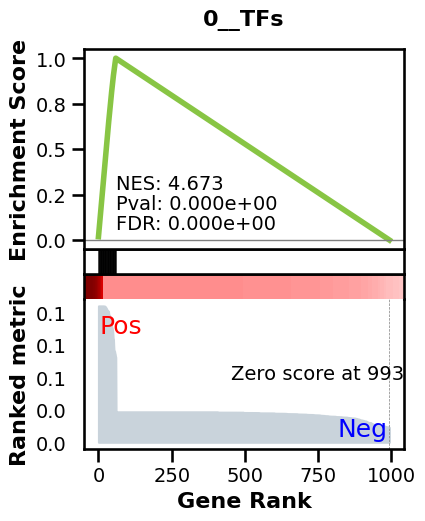

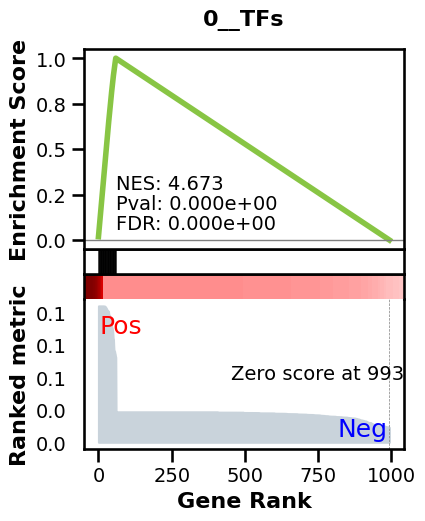

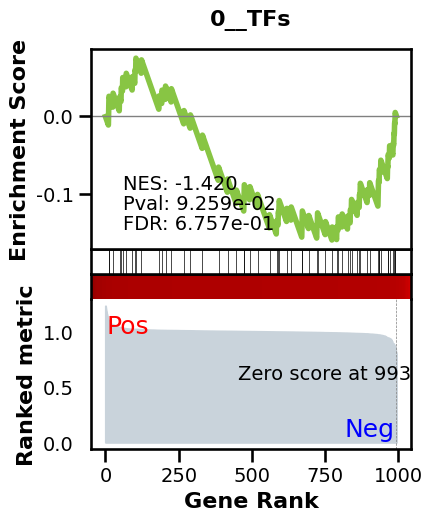

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 630 genes
intersection pct: 0.6338028169014085
precision:  0.005183510175682728 
recall:  0.4901315789473684 
random precision: 0.0007671537083301789


  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 1851.78it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005001412610736761
EPR: 22.128779320141835


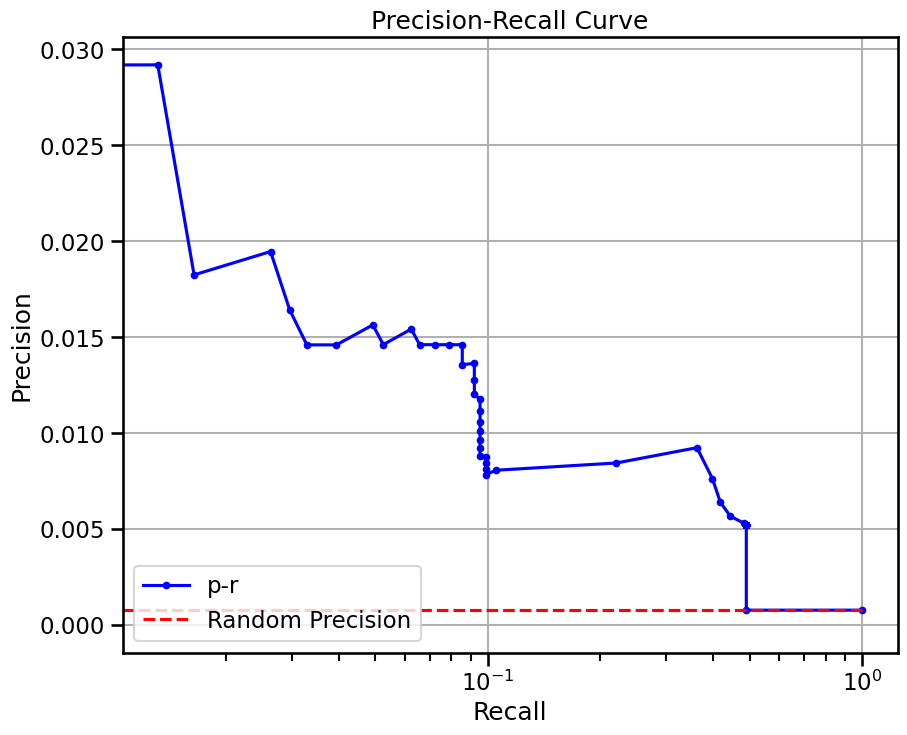

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 37.25 seconds
base enrichment


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


Top central genes: []


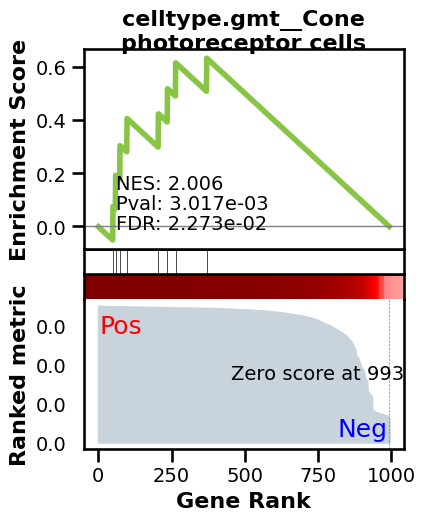

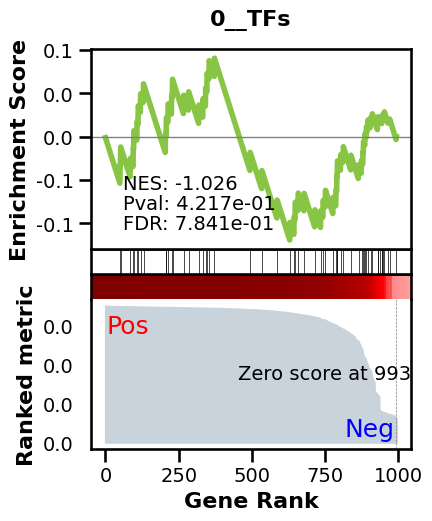

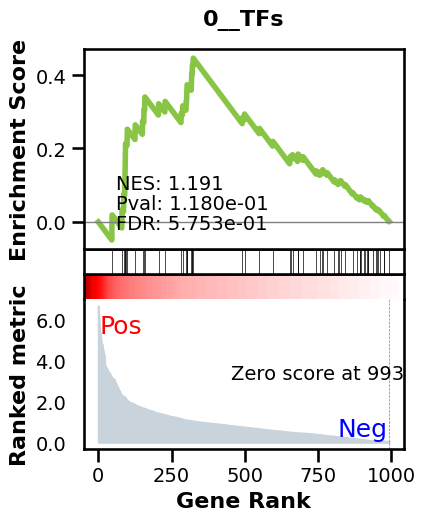

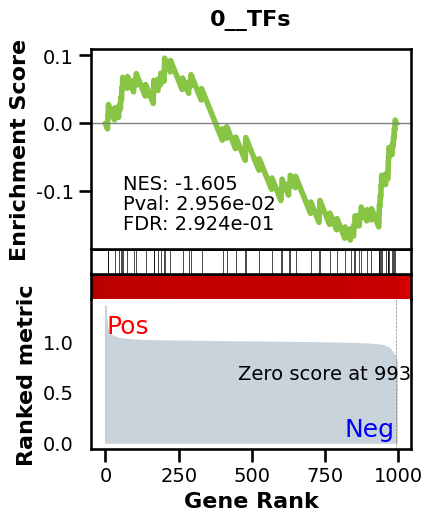

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 630 genes
intersection pct: 0.6338028169014085
precision:  0.0007712833782211967 
recall:  0.8157894736842105 
random precision: 0.0007671537083301789


  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 1921.05it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011899048099128628
EPR: 8.676461558703565


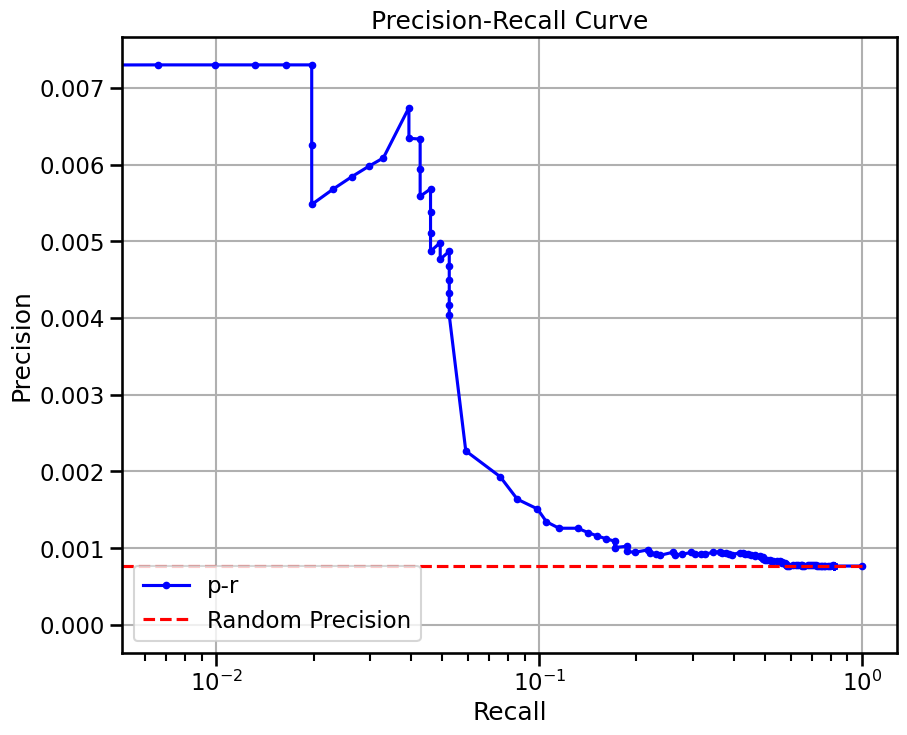

Mueller cell

View of AnnData object with n_obs × n_vars = 1024 × 4223
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_id

Elapsed time: 120.74 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


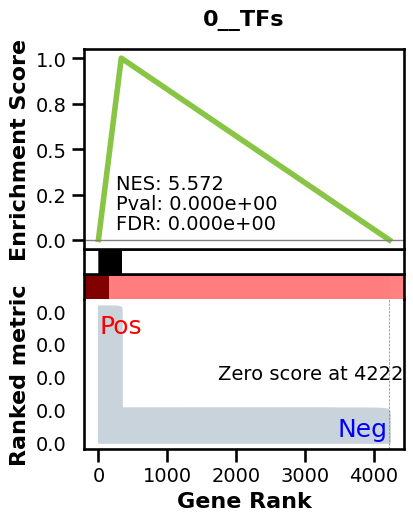

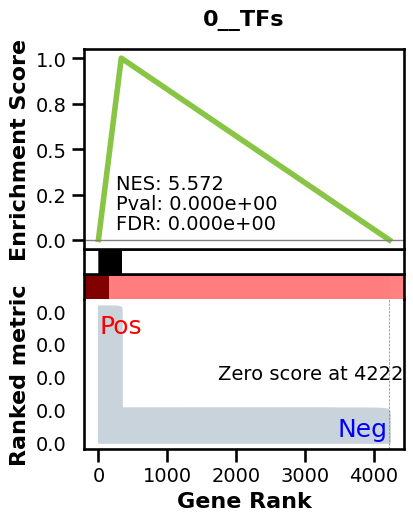

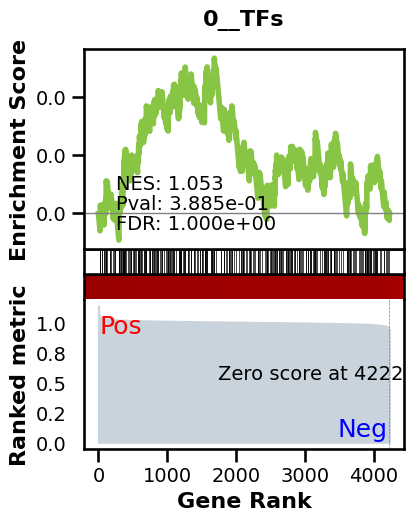

_________________________________________
TF specific enrichment


found some significant results for  1.7543859649122806 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3089 genes
intersection pct: 0.7314705185886811
precision:  0.006700079423766878 
recall:  0.4296452406041447 
random precision: 0.0014923210724331868


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.16it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.37it/s]

 14%|█▍        | 18/128 [00:00<00:01, 59.23it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.28it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.28it/s]

 28%|██▊       | 36/128 [00:00<00:01, 59.16it/s]

 33%|███▎      | 42/128 [00:00<00:01, 59.17it/s]

 38%|███▊      | 48/128 [00:00<00:01, 59.28it/s]

 42%|████▏     | 54/128 [00:00<00:01, 59.05it/s]

 47%|████▋     | 60/128 [00:01<00:01, 58.99it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 59.07it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 59.02it/s]

 61%|██████    | 78/128 [00:01<00:00, 58.33it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 57.81it/s]

 70%|███████   | 90/128 [00:01<00:00, 57.57it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.51it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.38it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.35it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 57.29it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 57.32it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 57.24it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.20it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0042819293731948165
EPR: 10.402777237938059


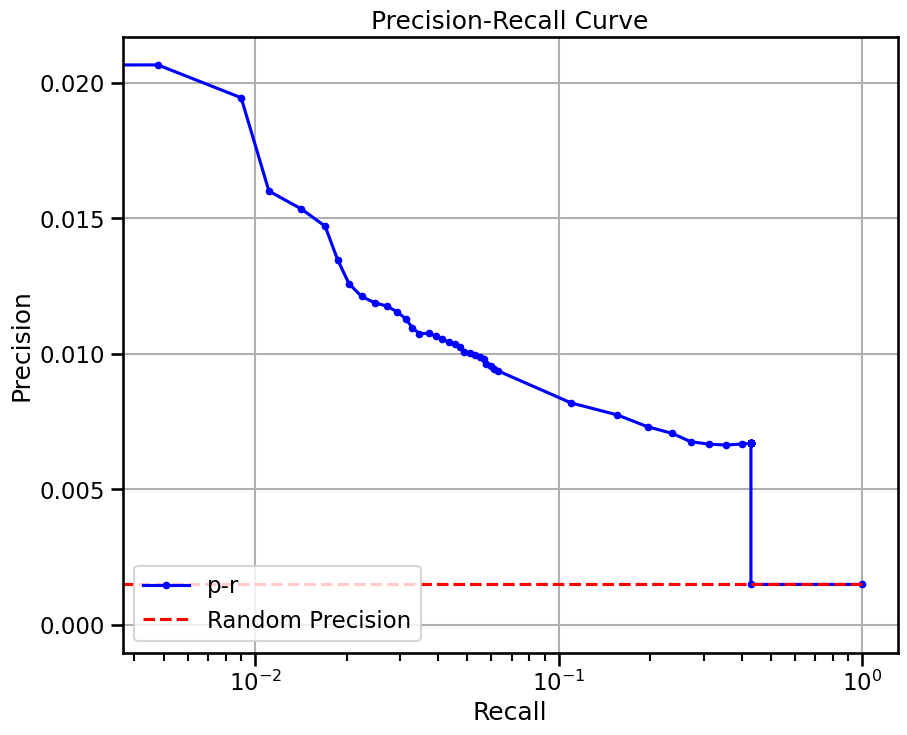

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 470.01 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


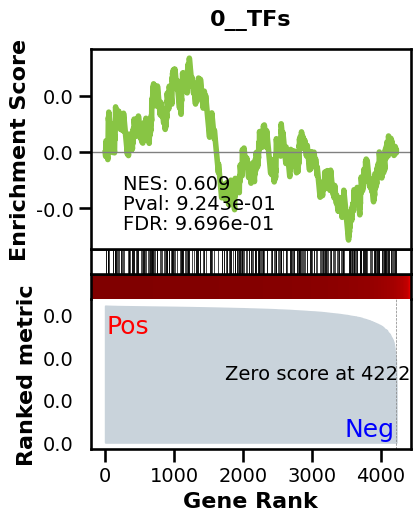

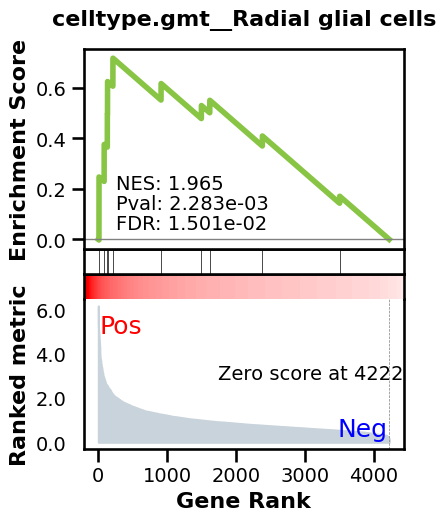

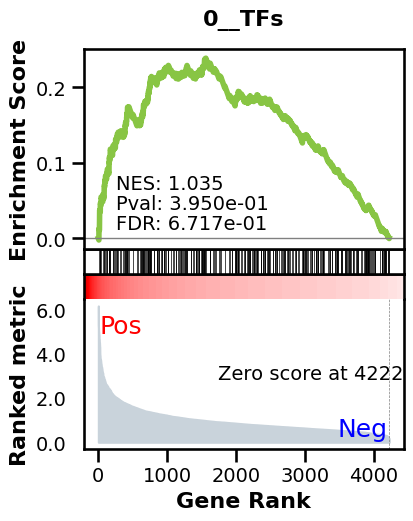

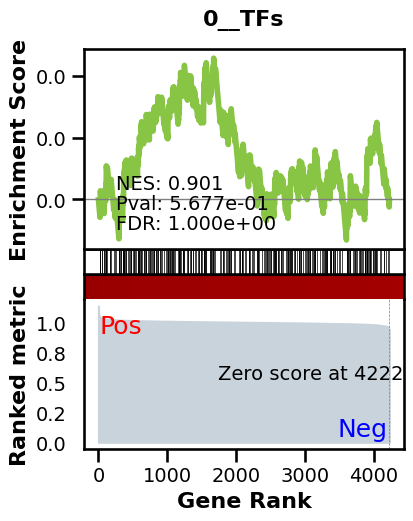

_________________________________________
TF specific enrichment


found some significant results for  22.80701754385965 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3089 genes
intersection pct: 0.7314705185886811
precision:  0.0015129210715207216 
recall:  0.8876712328767123 
random precision: 0.0014923210724331868


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.14it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.12it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.44it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.40it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.61it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.65it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.64it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.67it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.72it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.78it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.95it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.82it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.59it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.50it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.56it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.68it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.61it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.65it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.73it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.70it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.74it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.63it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016618480227231086
EPR: 2.8399121338521693


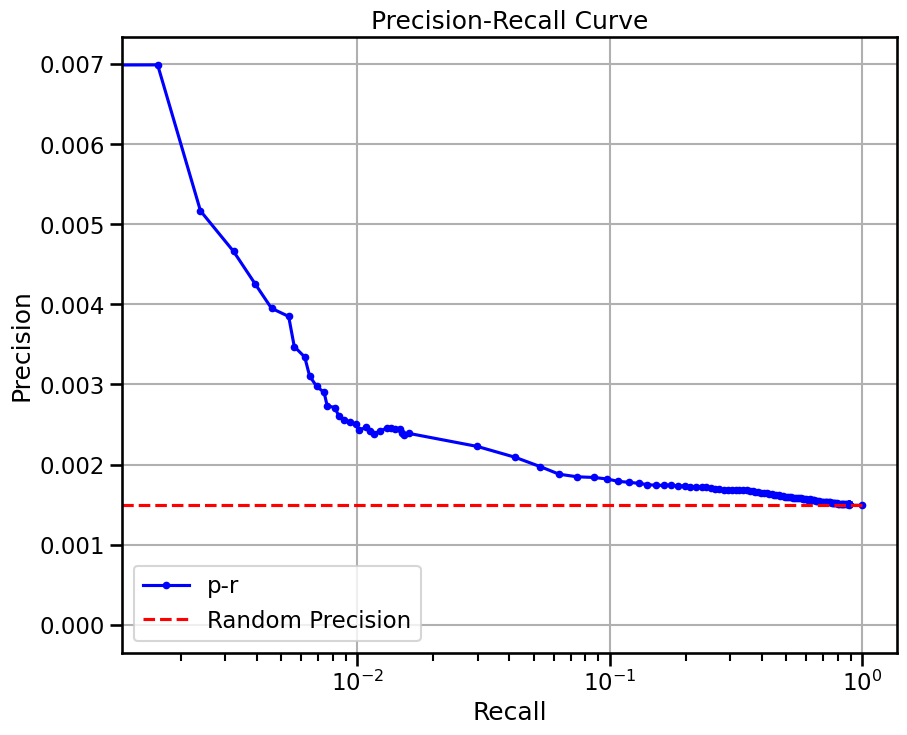

amacrine cell

View of AnnData object with n_obs × n_vars = 1024 × 4500
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_i

Elapsed time: 126.10 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


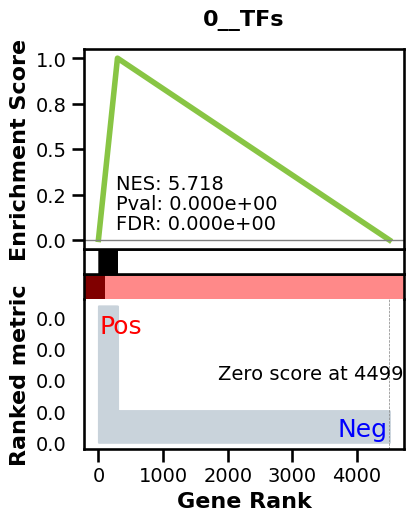

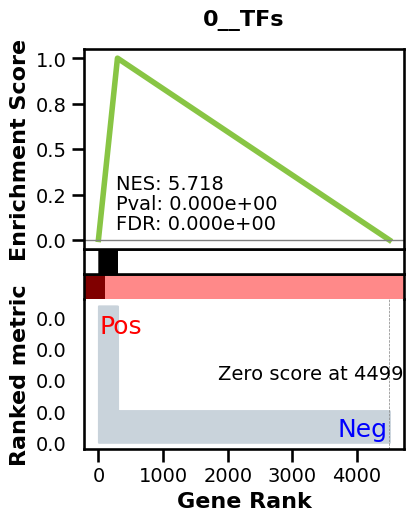

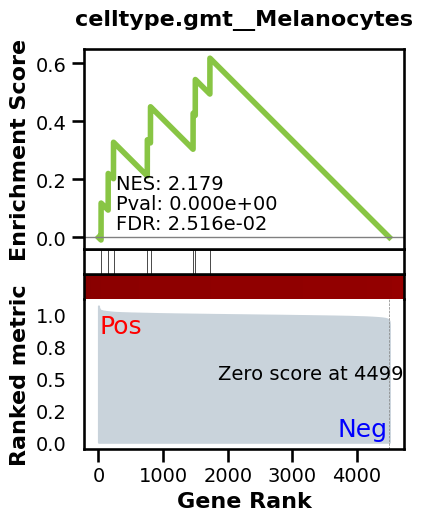

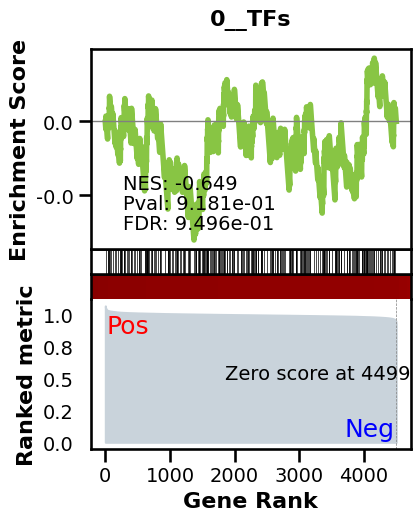

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3248 genes
intersection pct: 0.7217777777777777
precision:  0.0028750159518597415 
recall:  0.27014873746108614 
random precision: 0.0008223771545086712


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.57it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.64it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.69it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.75it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.78it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.47it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.00it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.62it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.30it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.35it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.16it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.05it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.97it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.89it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.82it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.57it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.06it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 53.36it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.36it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.30it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.10it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015767055766963067
EPR: 7.5101210560882


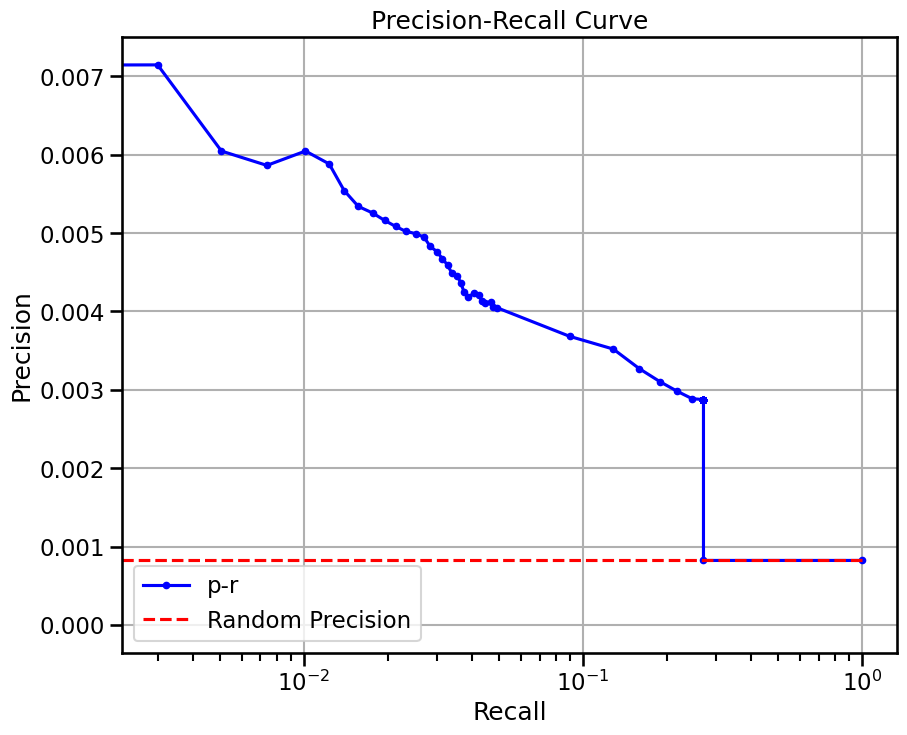

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 477.01 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


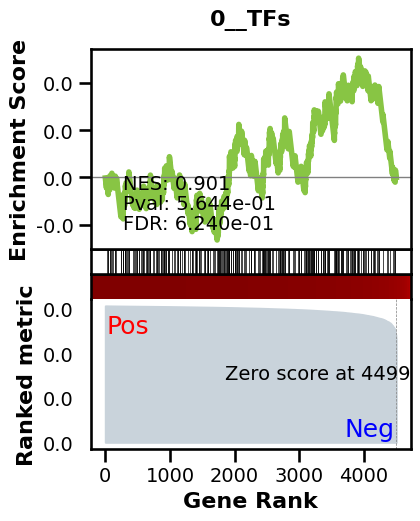

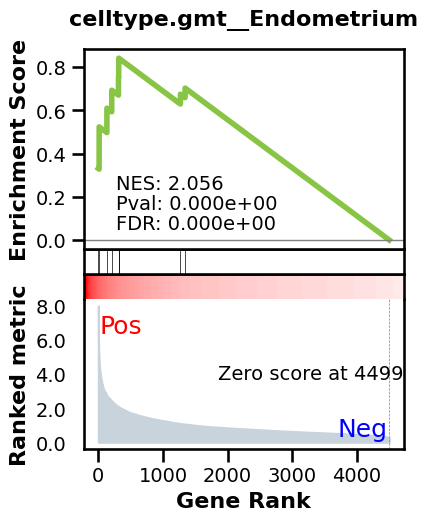

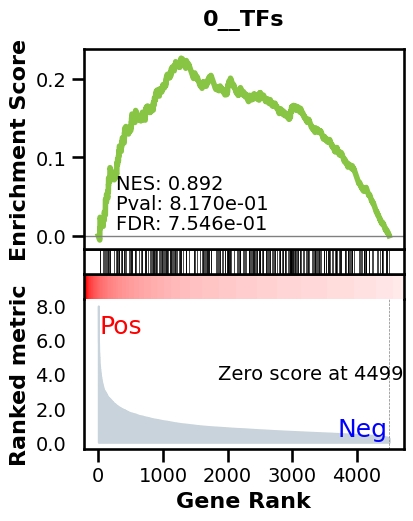

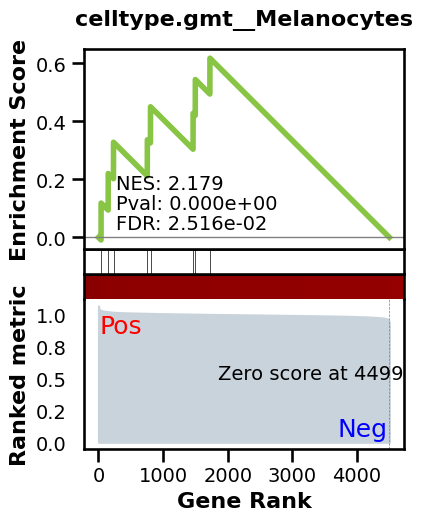

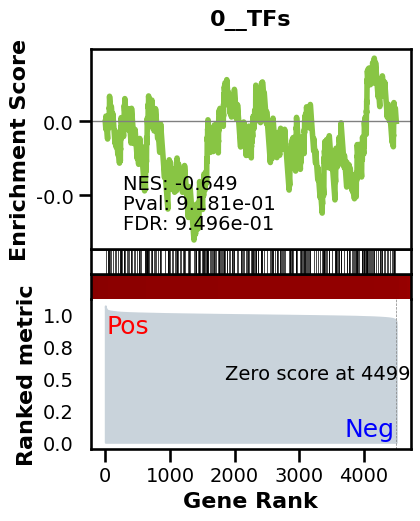

_________________________________________
TF specific enrichment


found some significant results for  3.8461538461538463 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3248 genes
intersection pct: 0.7217777777777777
precision:  0.000844394276705286 
recall:  0.9240170644528998 
random precision: 0.0008223771545086712


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.13it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.27it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.31it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.36it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.38it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.50it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.39it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.47it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.42it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.45it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.35it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.53it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.62it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.19it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.17it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.25it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.35it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.38it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.32it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.33it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.34it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009234492094865708
EPR: 2.388903135474288


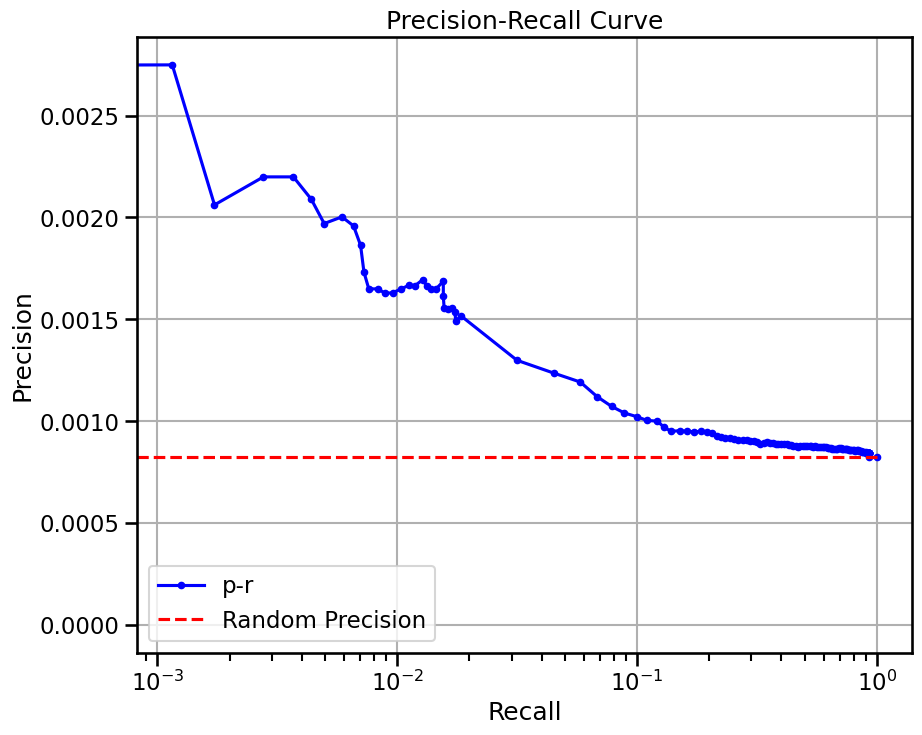

ON-bipolar cell

View of AnnData object with n_obs × n_vars = 1024 × 3546
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene

Elapsed time: 65.73 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


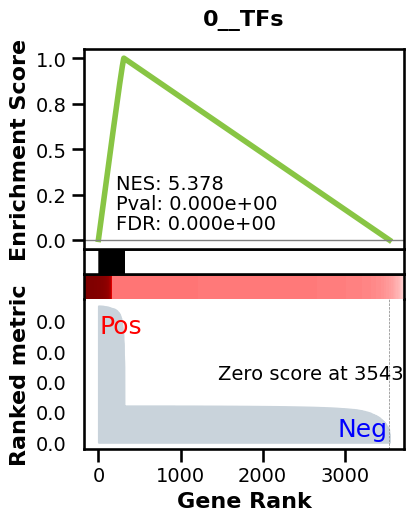

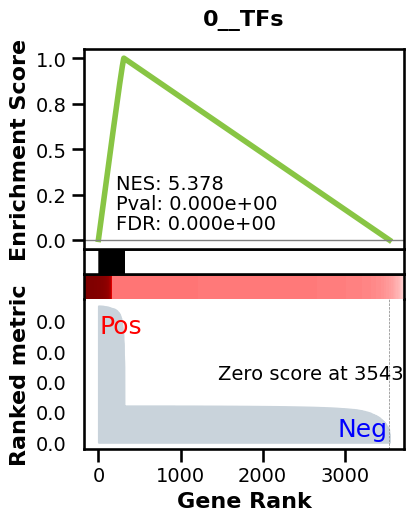

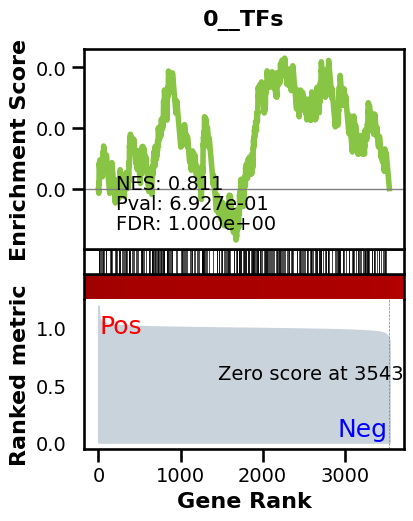

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2457 genes
intersection pct: 0.6932844243792325
precision:  0.0016050137572607766 
recall:  0.21035805626598467 
random precision: 0.0007775431228199958


  0%|          | 0/128 [00:00<?, ?it/s]

  8%|▊         | 10/128 [00:00<00:01, 97.96it/s]

 16%|█▌        | 20/128 [00:00<00:01, 98.04it/s]

 23%|██▎       | 30/128 [00:00<00:01, 97.94it/s]

 31%|███▏      | 40/128 [00:00<00:00, 97.88it/s]

 39%|███▉      | 50/128 [00:00<00:00, 97.96it/s]

 47%|████▋     | 60/128 [00:00<00:00, 97.67it/s]

 55%|█████▍    | 70/128 [00:00<00:00, 97.88it/s]

 62%|██████▎   | 80/128 [00:00<00:00, 98.01it/s]

 70%|███████   | 90/128 [00:00<00:00, 97.93it/s]

 78%|███████▊  | 100/128 [00:01<00:00, 96.45it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 96.99it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 97.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 97.56it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010702683738832966
EPR: 4.131571075848773


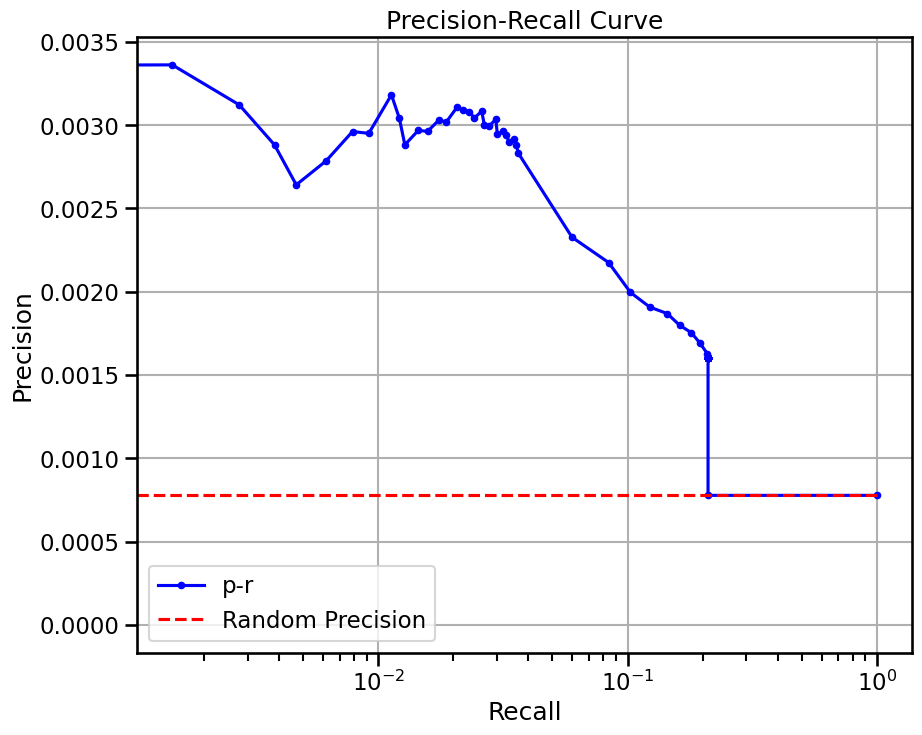

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 225.59 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


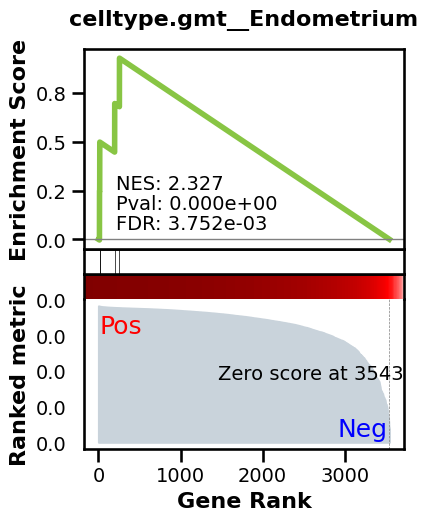

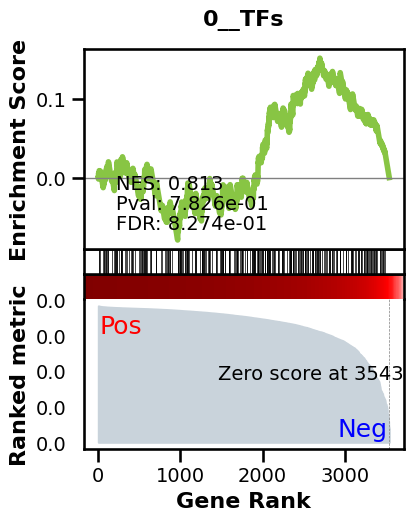

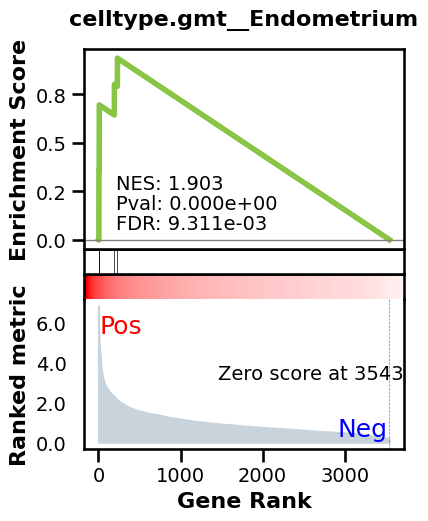

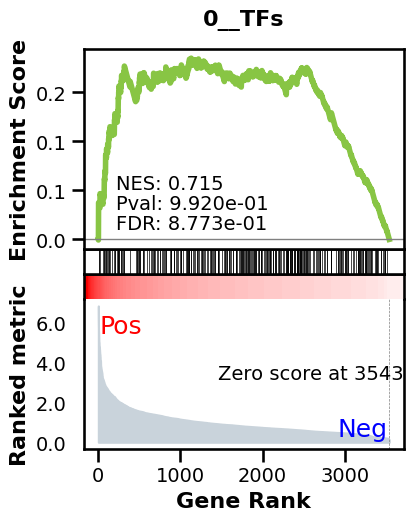

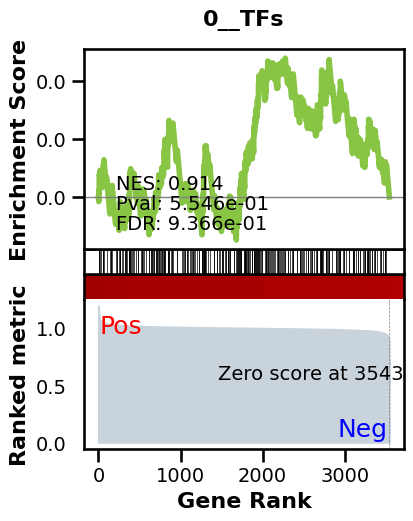

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2457 genes
intersection pct: 0.6932844243792325
precision:  0.0008415176329027988 
recall:  0.7962489343563512 
random precision: 0.0007775431228199958


  0%|          | 0/128 [00:00<?, ?it/s]

  9%|▊         | 11/128 [00:00<00:01, 102.50it/s]

 17%|█▋        | 22/128 [00:00<00:01, 102.45it/s]

 26%|██▌       | 33/128 [00:00<00:00, 102.52it/s]

 34%|███▍      | 44/128 [00:00<00:00, 102.55it/s]

 43%|████▎     | 55/128 [00:00<00:00, 102.48it/s]

 52%|█████▏    | 66/128 [00:00<00:00, 102.49it/s]

 60%|██████    | 77/128 [00:00<00:00, 102.51it/s]

 69%|██████▉   | 88/128 [00:00<00:00, 102.58it/s]

 77%|███████▋  | 99/128 [00:00<00:00, 102.56it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 102.59it/s]

 95%|█████████▍| 121/128 [00:01<00:00, 102.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 102.51it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009471480743814065
EPR: 1.9214849271443524


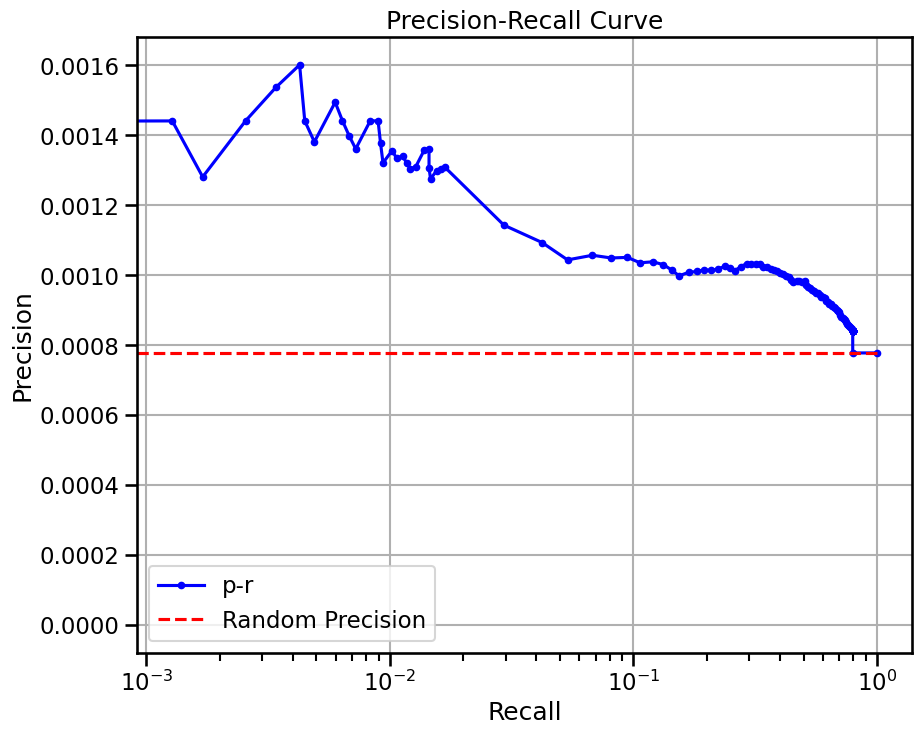

rod bipolar cell

View of AnnData object with n_obs × n_vars = 1024 × 4162
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gen

Elapsed time: 94.05 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


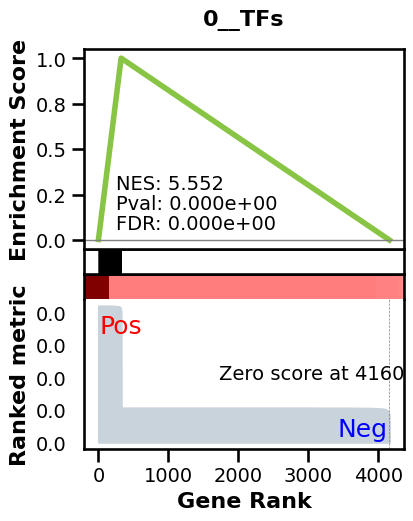

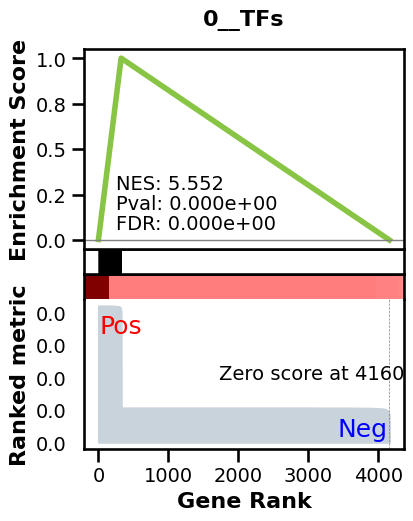

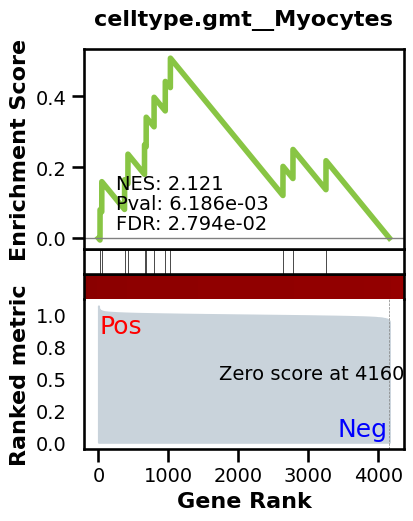

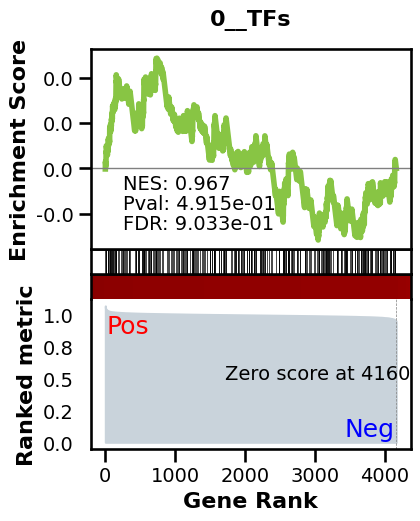

_________________________________________
TF specific enrichment


found some significant results for  4.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2954 genes
intersection pct: 0.7099254986782023
precision:  0.0014543891565542472 
recall:  0.1975560081466395 
random precision: 0.0006754431477943434


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 72.31it/s]

 12%|█▎        | 16/128 [00:00<00:01, 72.41it/s]

 19%|█▉        | 24/128 [00:00<00:01, 72.51it/s]

 25%|██▌       | 32/128 [00:00<00:01, 72.59it/s]

 31%|███▏      | 40/128 [00:00<00:01, 72.58it/s]

 38%|███▊      | 48/128 [00:00<00:01, 72.58it/s]

 44%|████▍     | 56/128 [00:00<00:00, 72.57it/s]

 50%|█████     | 64/128 [00:00<00:00, 72.60it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 72.60it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 72.60it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 72.59it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 72.58it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 72.59it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 72.63it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 72.56it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 72.50it/s]

100%|██████████| 128/128 [00:01<00:00, 72.53it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009895680299261854
EPR: 4.798675750053005


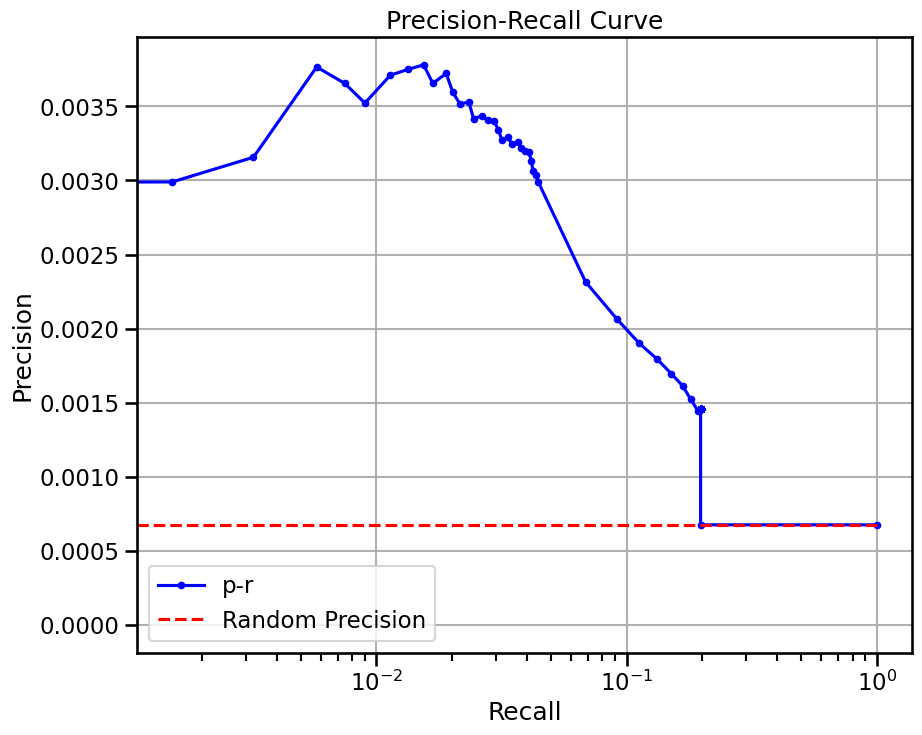

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 388.57 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


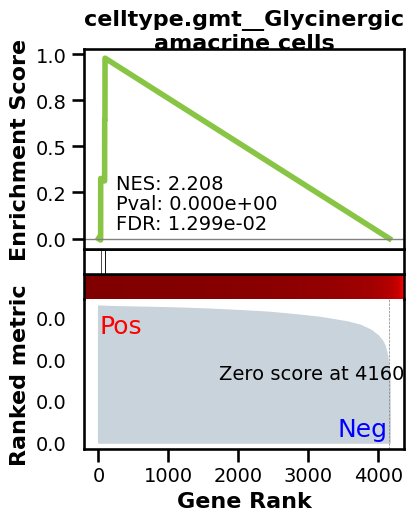

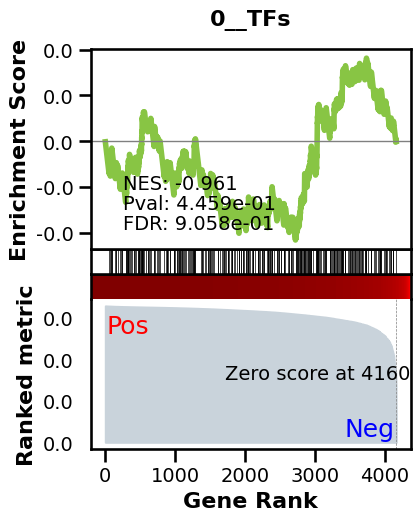

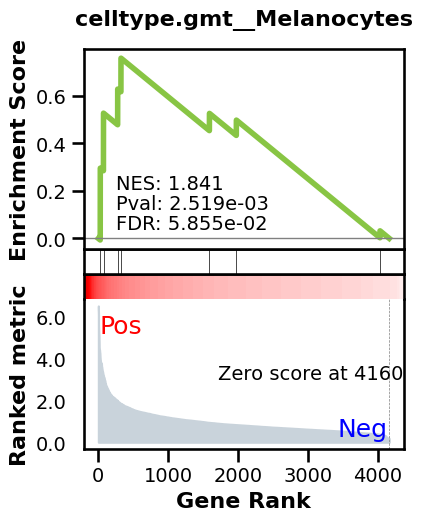

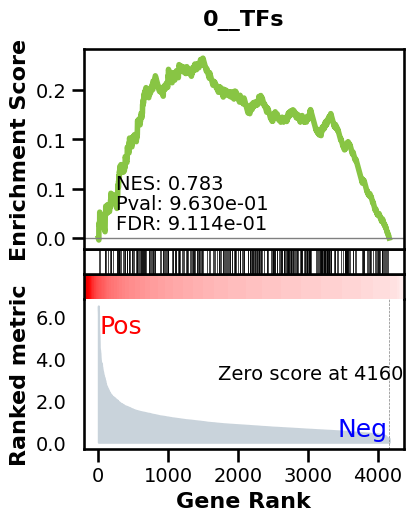

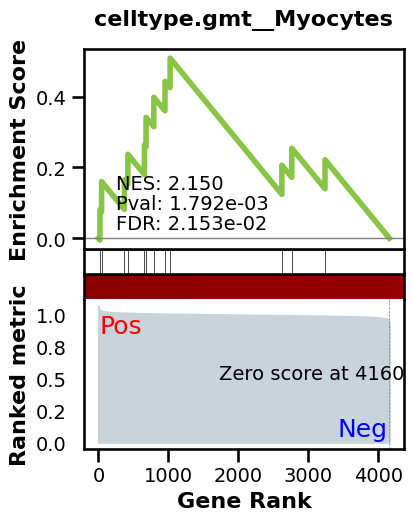

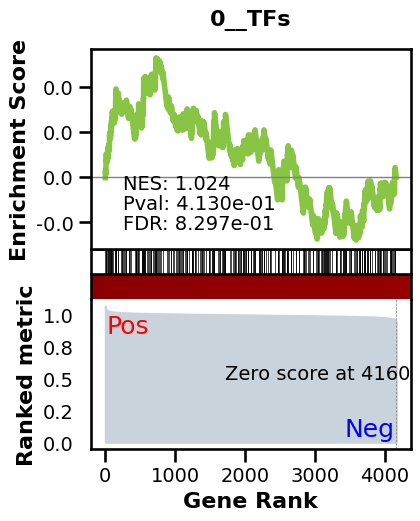

_________________________________________
TF specific enrichment


found some significant results for  16.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2954 genes
intersection pct: 0.7099254986782023
precision:  0.0007206093875638615 
recall:  0.8966395112016293 
random precision: 0.0006754431477943434


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 70.98it/s]

 12%|█▎        | 16/128 [00:00<00:01, 70.92it/s]

 19%|█▉        | 24/128 [00:00<00:01, 70.87it/s]

 25%|██▌       | 32/128 [00:00<00:01, 70.87it/s]

 31%|███▏      | 40/128 [00:00<00:01, 70.89it/s]

 38%|███▊      | 48/128 [00:00<00:01, 70.87it/s]

 44%|████▍     | 56/128 [00:00<00:01, 70.97it/s]

 50%|█████     | 64/128 [00:00<00:00, 70.89it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 70.87it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 70.86it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 70.85it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 70.83it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 70.81it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 70.80it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 70.80it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 70.77it/s]

100%|██████████| 128/128 [00:01<00:00, 70.82it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0007945227431214079
EPR: 3.7832712863141396


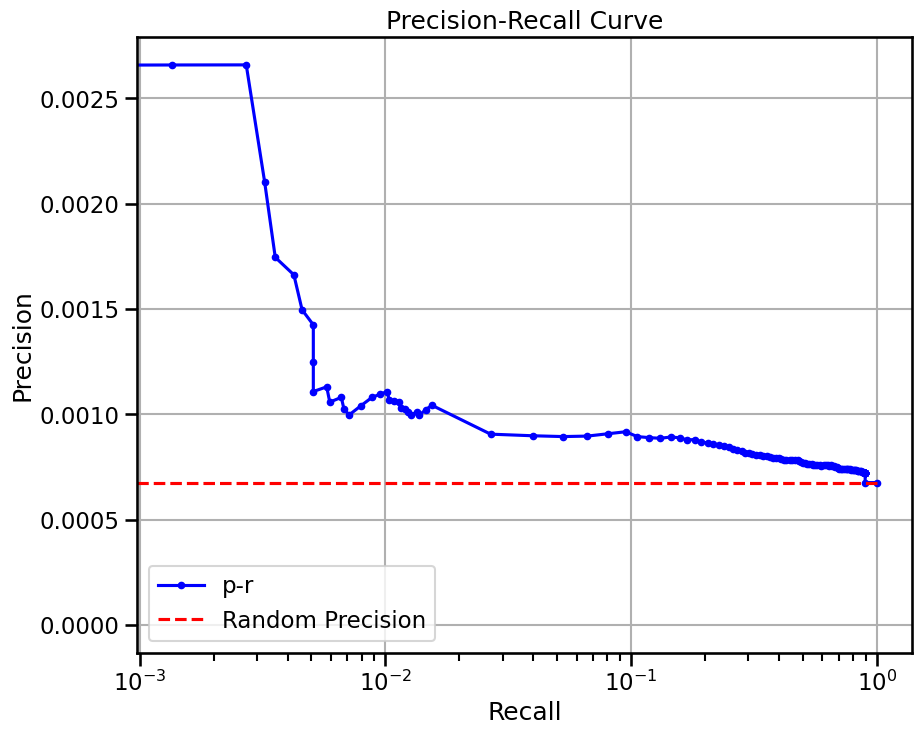

retinal cone cell

View of AnnData object with n_obs × n_vars = 1024 × 4201
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_ge

Elapsed time: 108.71 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


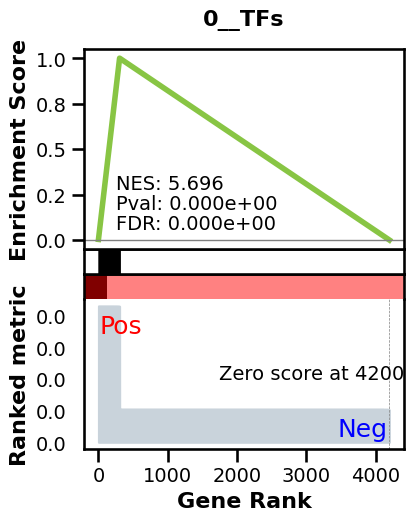

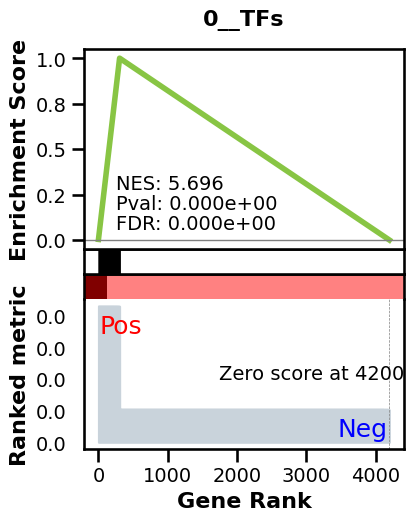

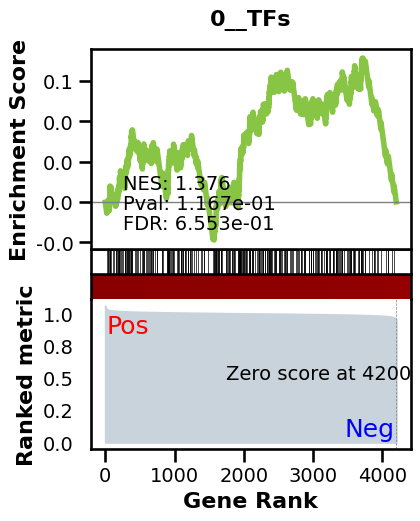

_________________________________________
TF specific enrichment


found some significant results for  6.451612903225806 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2973 genes
intersection pct: 0.7076886455605809
precision:  0.0023011684082831422 
recall:  0.2701436602123673 
random precision: 0.000724782350259559


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 69.82it/s]

 12%|█▏        | 15/128 [00:00<00:01, 70.06it/s]

 18%|█▊        | 23/128 [00:00<00:01, 70.08it/s]

 24%|██▍       | 31/128 [00:00<00:01, 70.15it/s]

 30%|███       | 39/128 [00:00<00:01, 70.11it/s]

 37%|███▋      | 47/128 [00:00<00:01, 70.16it/s]

 43%|████▎     | 55/128 [00:00<00:01, 70.19it/s]

 49%|████▉     | 63/128 [00:00<00:00, 70.22it/s]

 55%|█████▌    | 71/128 [00:01<00:00, 69.40it/s]

 62%|██████▏   | 79/128 [00:01<00:00, 69.62it/s]

 68%|██████▊   | 87/128 [00:01<00:00, 69.78it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 69.90it/s]

 80%|████████  | 103/128 [00:01<00:00, 69.98it/s]

 87%|████████▋ | 111/128 [00:01<00:00, 70.02it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 70.04it/s]

 99%|█████████▉| 127/128 [00:01<00:00, 70.13it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 69.96it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014864836534671045
EPR: 8.713955503162232


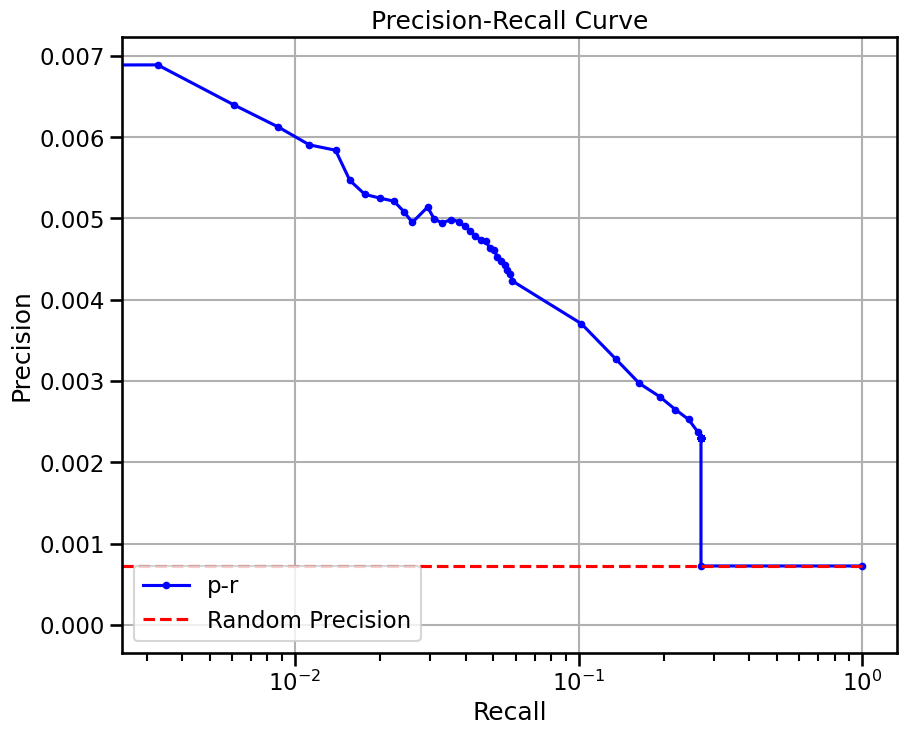

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 431.12 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


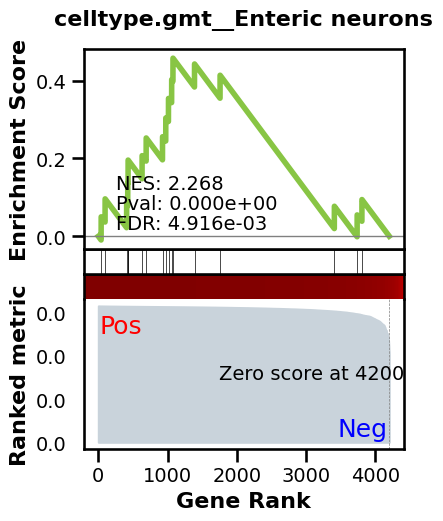

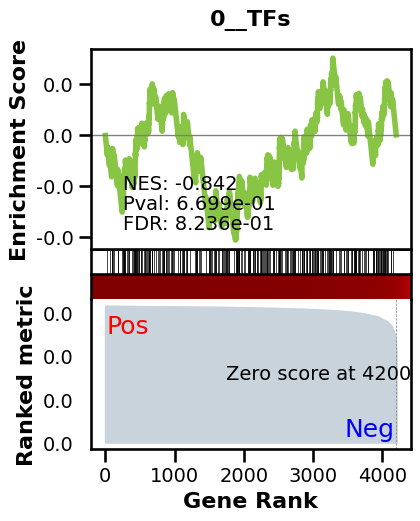

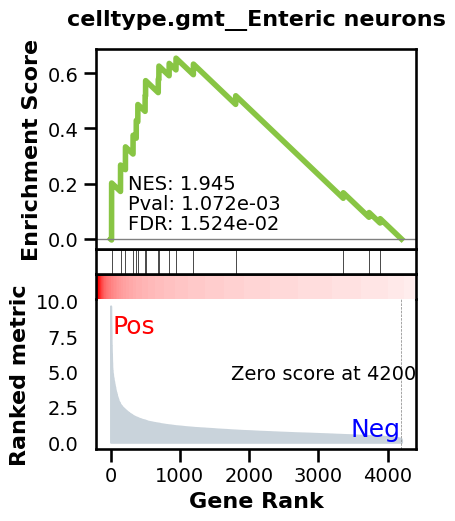

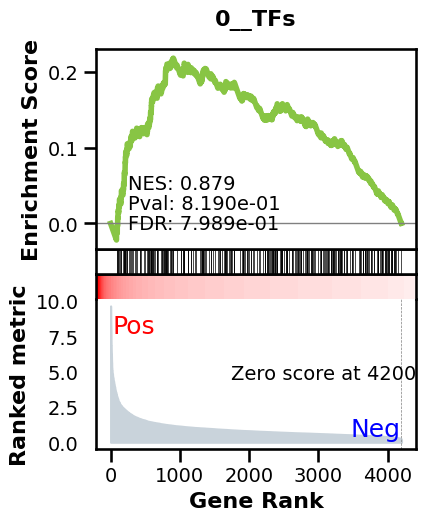

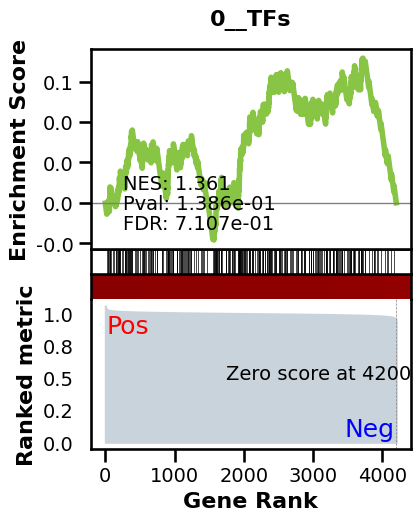

_________________________________________
TF specific enrichment


found some significant results for  3.225806451612903 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2973 genes
intersection pct: 0.7076886455605809
precision:  0.0007499169207251787 
recall:  0.943316677076827 
random precision: 0.000724782350259559


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 70.78it/s]

 12%|█▎        | 16/128 [00:00<00:01, 70.79it/s]

 19%|█▉        | 24/128 [00:00<00:01, 70.82it/s]

 25%|██▌       | 32/128 [00:00<00:01, 70.88it/s]

 31%|███▏      | 40/128 [00:00<00:01, 70.98it/s]

 38%|███▊      | 48/128 [00:00<00:01, 70.92it/s]

 44%|████▍     | 56/128 [00:00<00:01, 69.93it/s]

 50%|█████     | 64/128 [00:00<00:00, 70.22it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 70.52it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 70.61it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 70.67it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 70.72it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 70.86it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 70.89it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 70.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 70.75it/s]

100%|██████████| 128/128 [00:01<00:00, 70.67it/s]

Area Under Precision-Recall Curve (AUPRC):  0.000832670492613131
EPR: 1.725389656840716


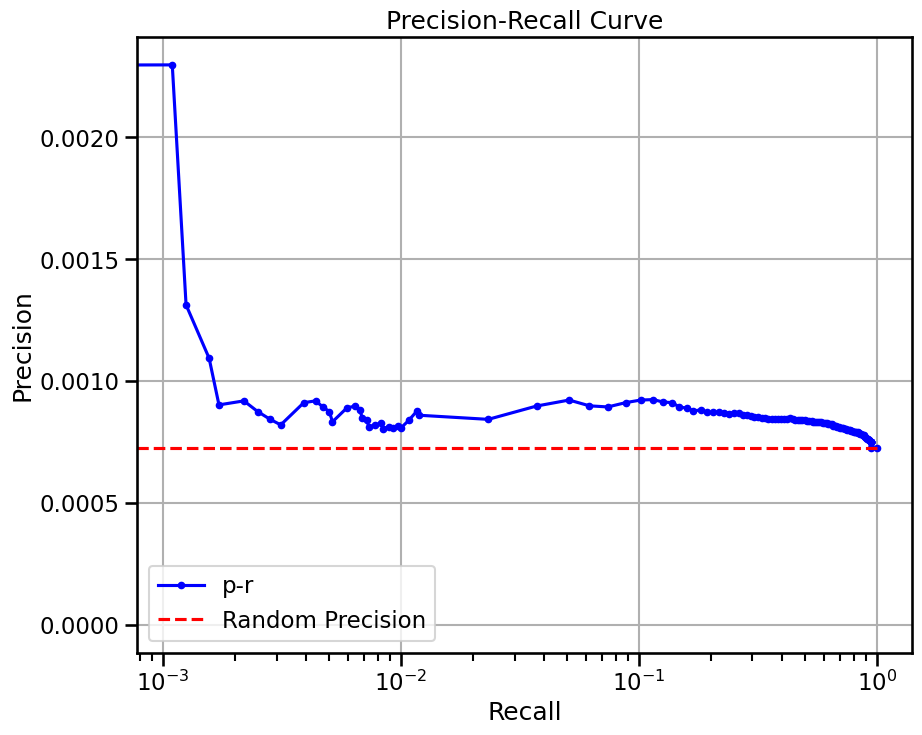

retina horizontal cell

View of AnnData object with n_obs × n_vars = 1024 × 4569
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'nc

running jobs on 20 threads


Elapsed time: 121.22 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


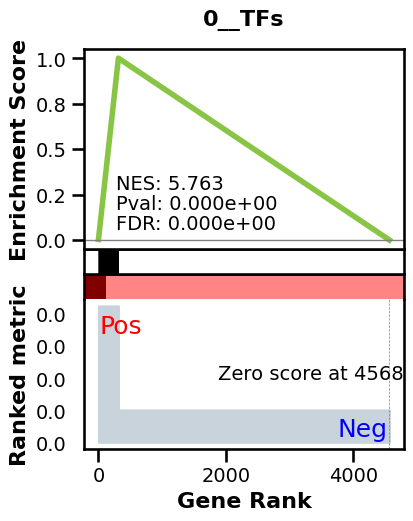

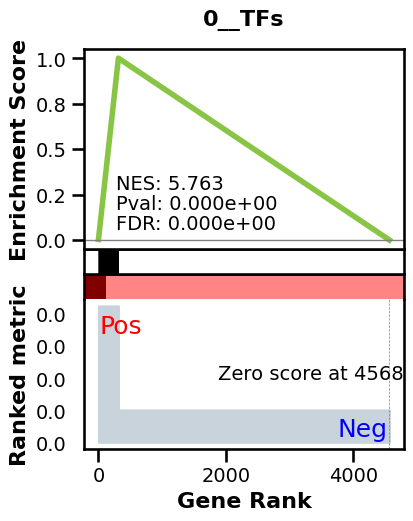

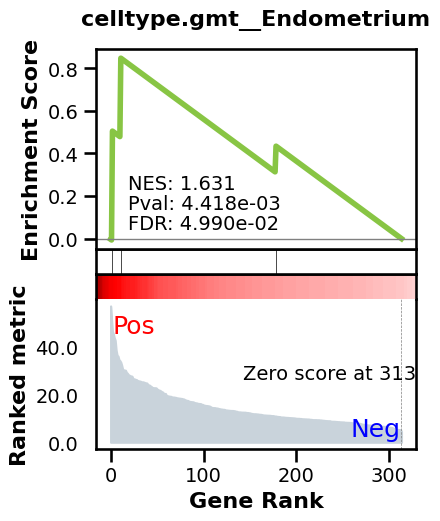

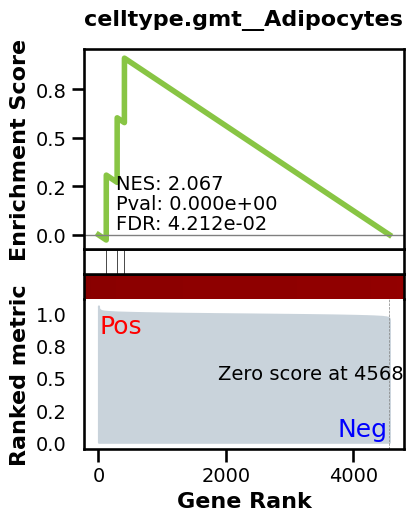

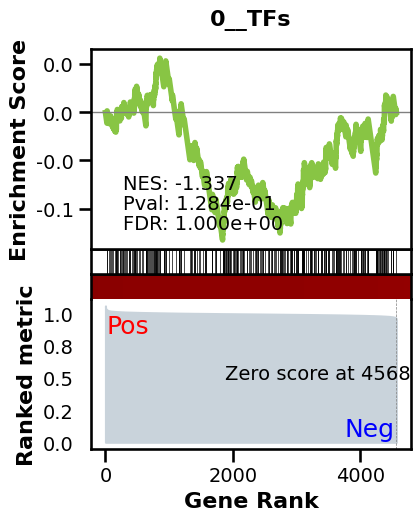

_________________________________________
TF specific enrichment


found some significant results for  8.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3262 genes
intersection pct: 0.7139417815714598
precision:  0.0037425559274425224 
recall:  0.3084077031470174 
random precision: 0.0010007161536551004


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 57.63it/s]

  9%|▉         | 12/128 [00:00<00:02, 57.70it/s]

 14%|█▍        | 18/128 [00:00<00:01, 57.65it/s]

 19%|█▉        | 24/128 [00:00<00:01, 57.68it/s]

 23%|██▎       | 30/128 [00:00<00:01, 57.72it/s]

 28%|██▊       | 36/128 [00:00<00:01, 57.70it/s]

 33%|███▎      | 42/128 [00:00<00:01, 57.70it/s]

 38%|███▊      | 48/128 [00:00<00:01, 57.71it/s]

 42%|████▏     | 54/128 [00:00<00:01, 57.72it/s]

 47%|████▋     | 60/128 [00:01<00:01, 57.73it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 57.71it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 57.72it/s]

 61%|██████    | 78/128 [00:01<00:00, 57.73it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 57.73it/s]

 70%|███████   | 90/128 [00:01<00:00, 57.75it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 57.76it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 57.79it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.79it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 57.81it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 57.79it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 57.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 57.72it/s]

Area Under Precision-Recall Curve (AUPRC):  0.002117455844109466
EPR: 8.092062717013889


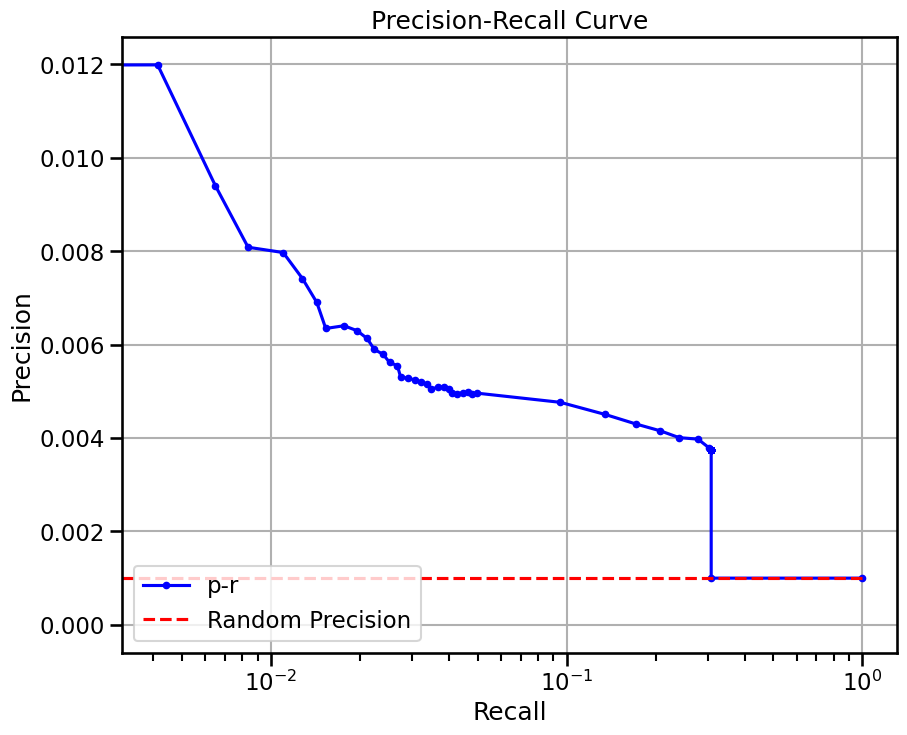

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 481.77 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


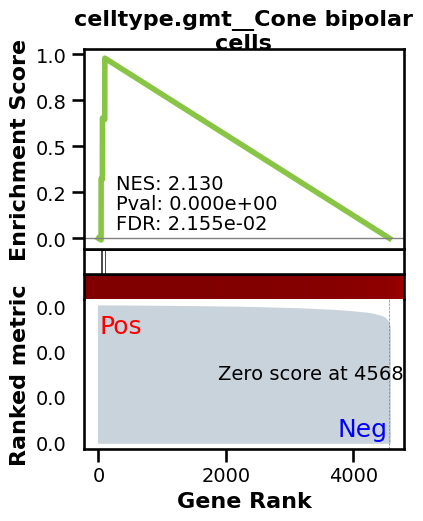

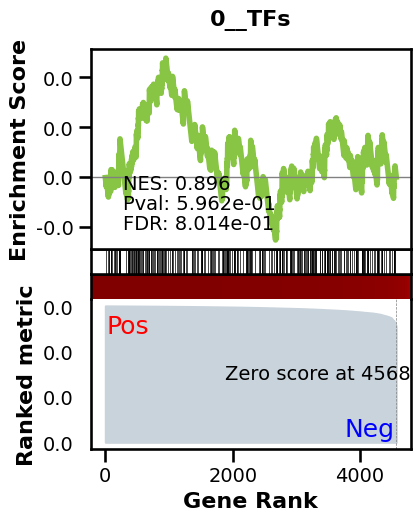

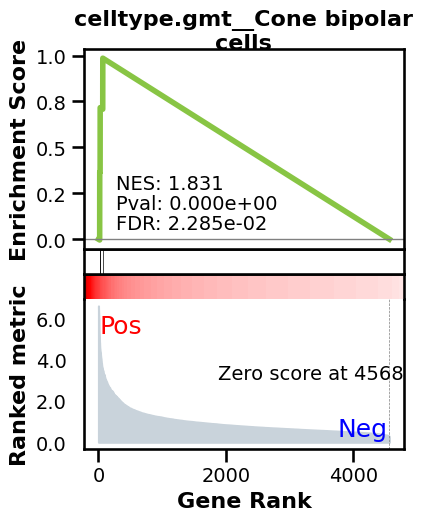

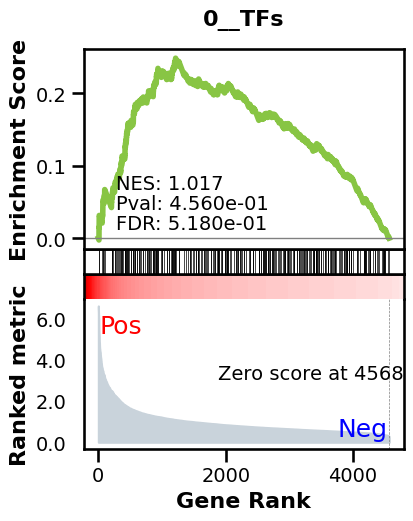

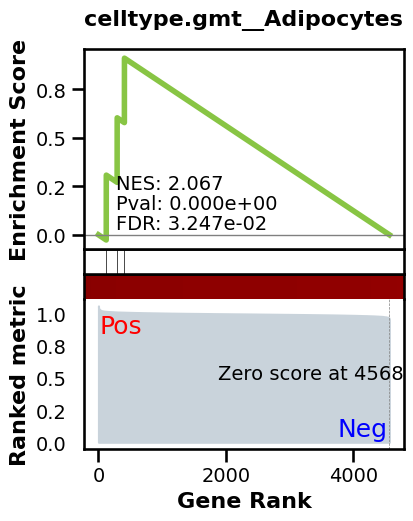

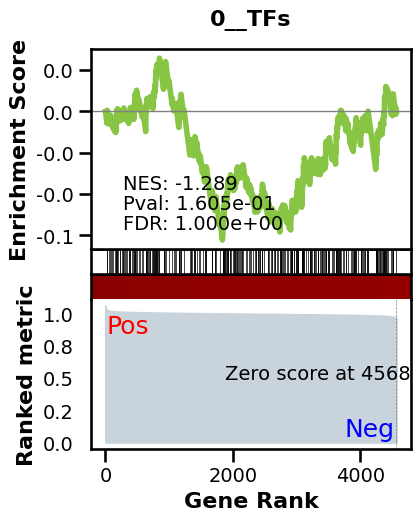

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3262 genes
intersection pct: 0.7139417815714598
precision:  0.001021745305459295 
recall:  0.9383748238609676 
random precision: 0.0010007161536551004


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 53.24it/s]

  9%|▉         | 12/128 [00:00<00:02, 53.49it/s]

 14%|█▍        | 18/128 [00:00<00:02, 53.56it/s]

 19%|█▉        | 24/128 [00:00<00:01, 53.54it/s]

 23%|██▎       | 30/128 [00:00<00:01, 53.43it/s]

 28%|██▊       | 36/128 [00:00<00:01, 53.42it/s]

 33%|███▎      | 42/128 [00:00<00:01, 53.34it/s]

 38%|███▊      | 48/128 [00:00<00:01, 53.38it/s]

 42%|████▏     | 54/128 [00:01<00:01, 53.39it/s]

 47%|████▋     | 60/128 [00:01<00:01, 53.32it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 53.16it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 53.29it/s]

 61%|██████    | 78/128 [00:01<00:00, 53.32it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 53.36it/s]

 70%|███████   | 90/128 [00:01<00:00, 53.43it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 53.41it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 53.43it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 53.37it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 53.43it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 53.36it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 53.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 53.35it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011134866674209914
EPR: 2.353188251212047


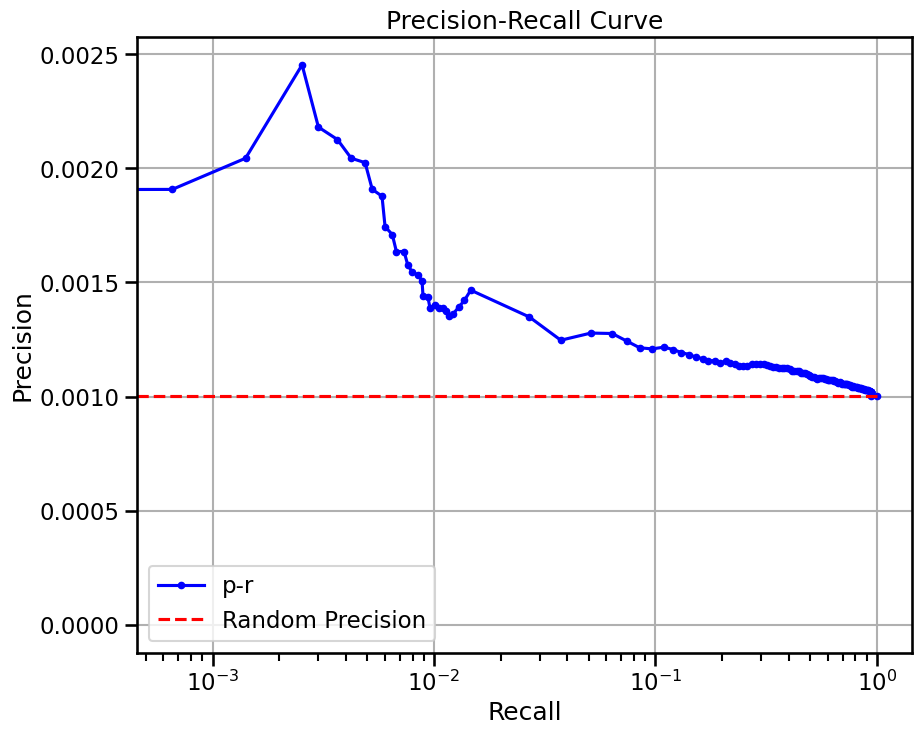

retinal ganglion cell

View of AnnData object with n_obs × n_vars = 493 × 4691
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi

running jobs on 20 threads


Elapsed time: 88.77 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


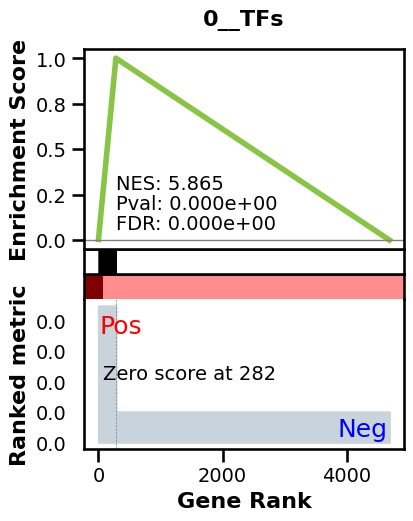

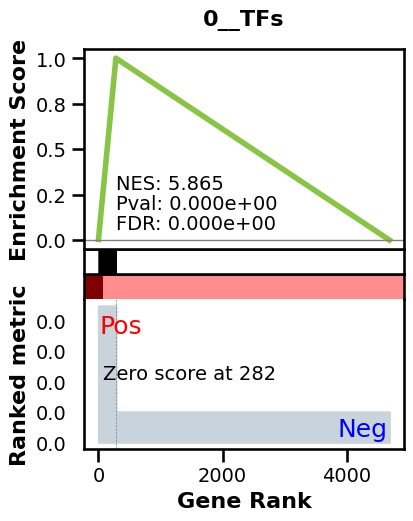

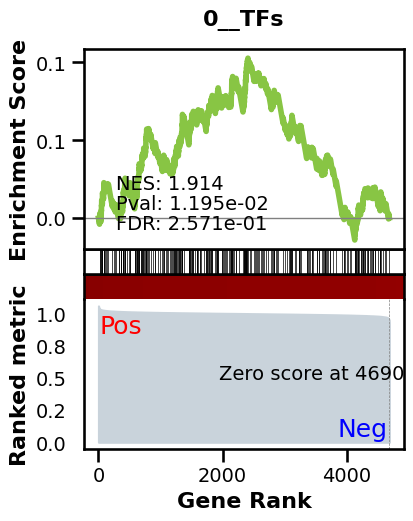

_________________________________________
TF specific enrichment


found some significant results for  4.545454545454546 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3458 genes
intersection pct: 0.7371562566616926
precision:  0.003223273688995413 
recall:  0.23202447730749617 
random precision: 0.000984247851778263


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 45.97it/s]

  8%|▊         | 10/128 [00:00<00:02, 46.03it/s]

 12%|█▏        | 15/128 [00:00<00:02, 45.85it/s]

 16%|█▌        | 20/128 [00:00<00:02, 45.83it/s]

 20%|█▉        | 25/128 [00:00<00:02, 45.64it/s]

 23%|██▎       | 30/128 [00:00<00:02, 45.60it/s]

 27%|██▋       | 35/128 [00:00<00:02, 45.63it/s]

 31%|███▏      | 40/128 [00:00<00:01, 45.70it/s]

 35%|███▌      | 45/128 [00:00<00:01, 45.75it/s]

 39%|███▉      | 50/128 [00:01<00:01, 45.83it/s]

 43%|████▎     | 55/128 [00:01<00:01, 45.79it/s]

 47%|████▋     | 60/128 [00:01<00:01, 45.73it/s]

 51%|█████     | 65/128 [00:01<00:01, 45.80it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 45.90it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 45.83it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 45.69it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 45.45it/s]

 70%|███████   | 90/128 [00:01<00:00, 45.45it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 44.83it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 45.11it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 45.20it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 45.24it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 45.43it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 45.55it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 45.50it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 45.54it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017174189778148216
EPR: 5.752322594784133


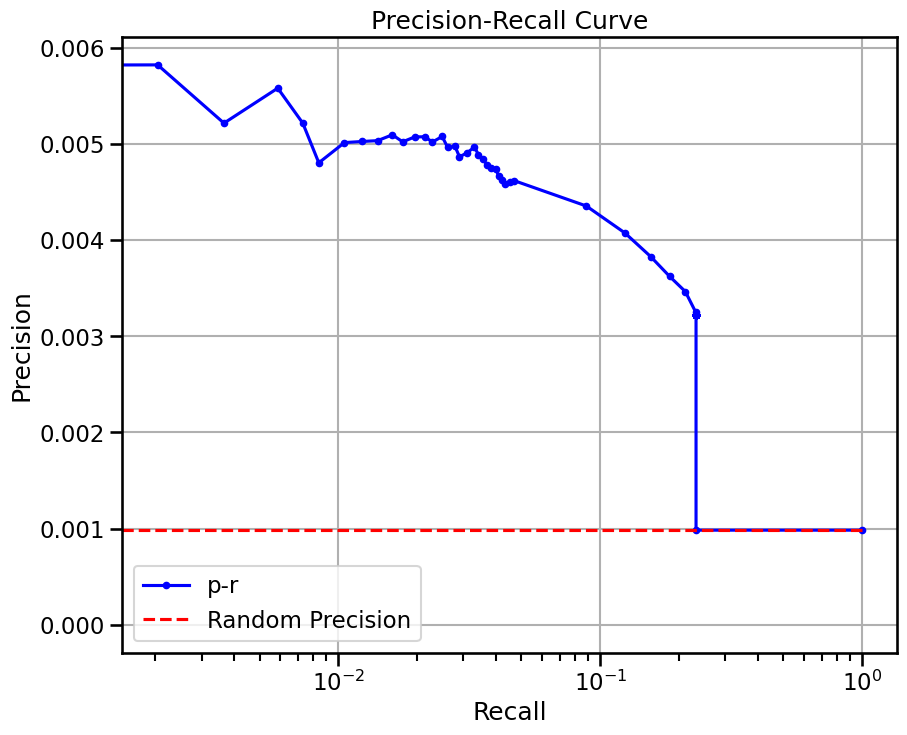

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 293.77 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


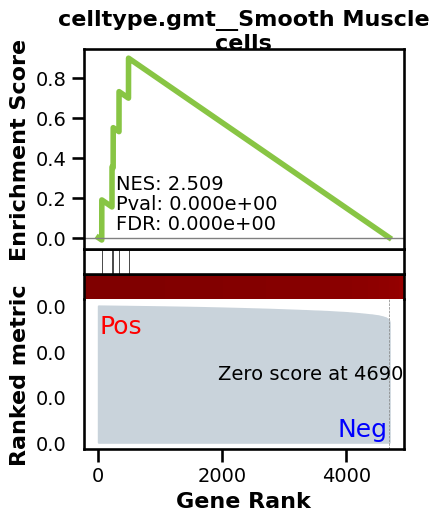

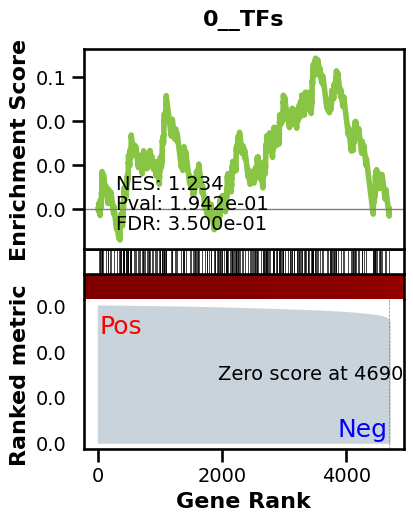

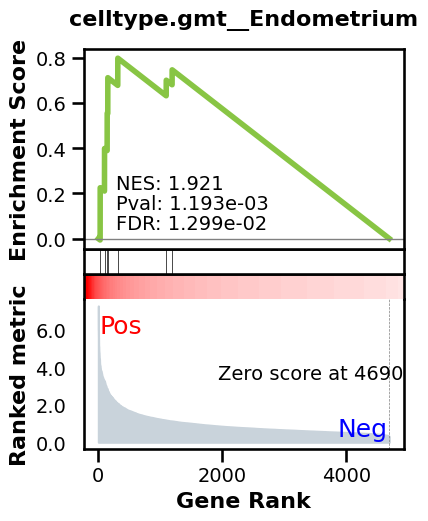

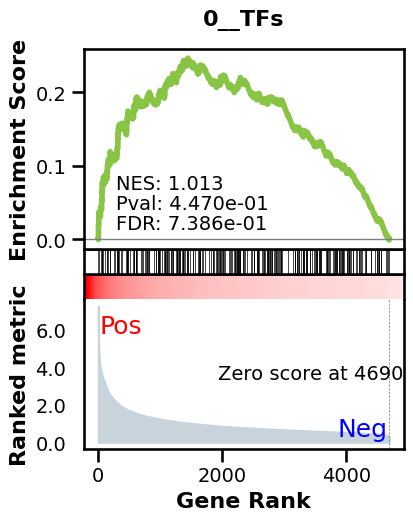

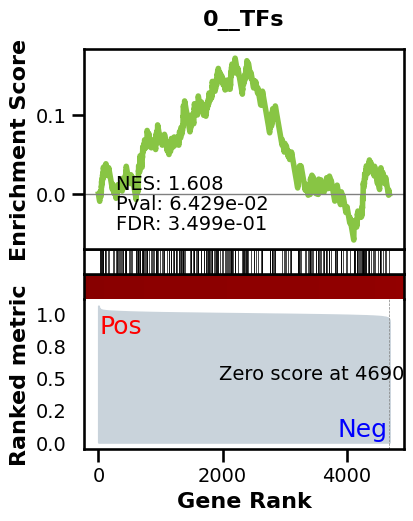

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3458 genes
intersection pct: 0.7371562566616926
precision:  0.0010037055165104732 
recall:  0.901580826109128 
random precision: 0.000984247851778263


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 43.90it/s]

  8%|▊         | 10/128 [00:00<00:02, 44.46it/s]

 12%|█▏        | 15/128 [00:00<00:02, 44.34it/s]

 16%|█▌        | 20/128 [00:00<00:02, 44.11it/s]

 20%|█▉        | 25/128 [00:00<00:02, 44.17it/s]

 23%|██▎       | 30/128 [00:00<00:02, 44.18it/s]

 27%|██▋       | 35/128 [00:00<00:02, 44.00it/s]

 31%|███▏      | 40/128 [00:00<00:02, 43.87it/s]

 35%|███▌      | 45/128 [00:01<00:01, 43.69it/s]

 39%|███▉      | 50/128 [00:01<00:01, 43.79it/s]

 43%|████▎     | 55/128 [00:01<00:01, 43.80it/s]

 47%|████▋     | 60/128 [00:01<00:01, 43.84it/s]

 51%|█████     | 65/128 [00:01<00:01, 44.05it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 44.21it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 44.49it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 44.60it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 44.78it/s]

 70%|███████   | 90/128 [00:02<00:00, 44.62it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 44.36it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 43.58it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 42.13it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 42.77it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 43.25it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 43.36it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 43.76it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.88it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010586215065546756
EPR: 1.6427405372437183


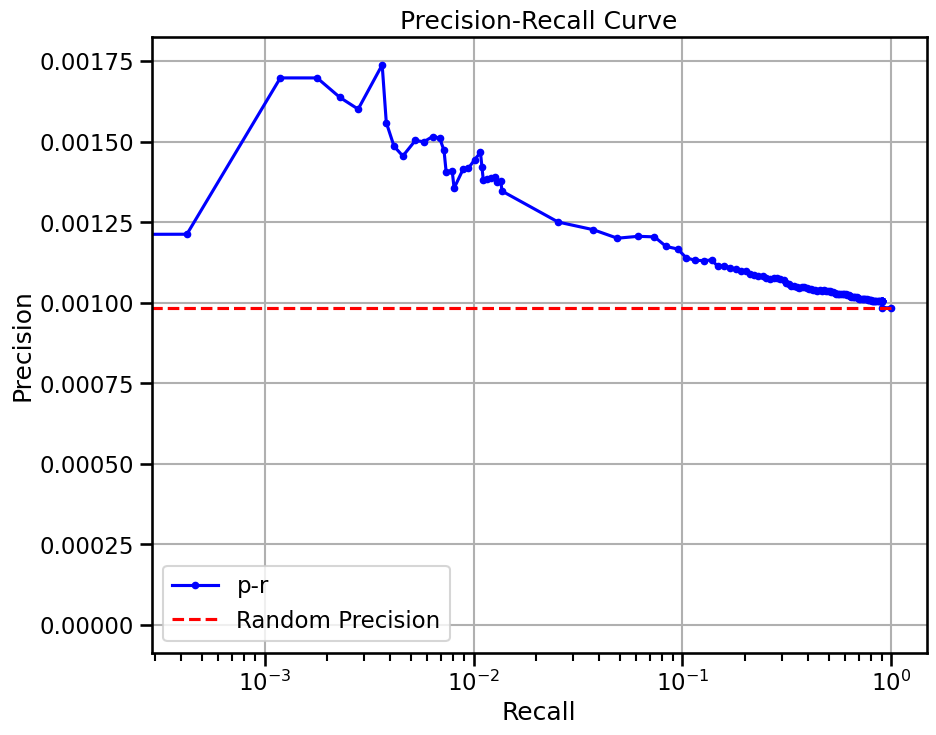

astrocyte

View of AnnData object with n_obs × n_vars = 232 × 4536
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_ids', 

Elapsed time: 48.07 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


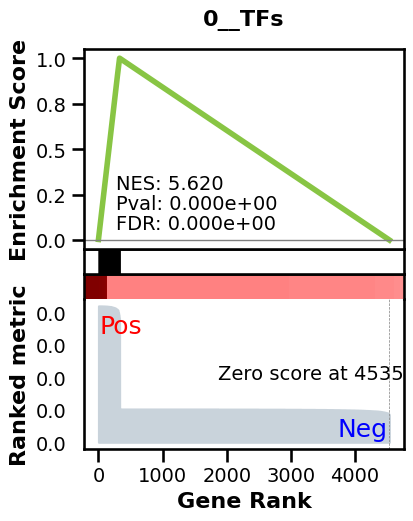

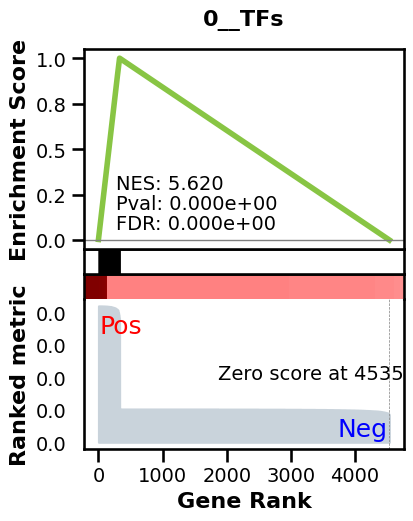

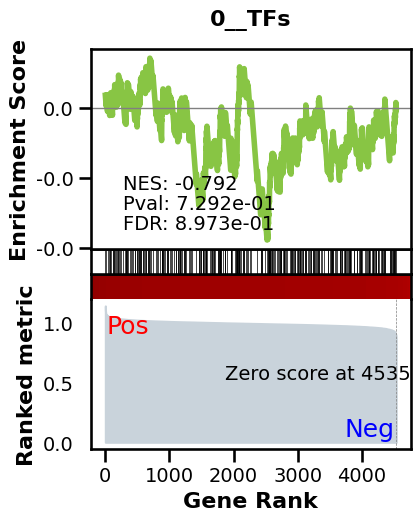

_________________________________________
TF specific enrichment


found some significant results for  4.081632653061225 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3325 genes
intersection pct: 0.7330246913580247
precision:  0.007293333954924296 
recall:  0.42213827426995265 
random precision: 0.0015089166960723108


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 47.70it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.92it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.64it/s]

 16%|█▌        | 20/128 [00:00<00:02, 47.54it/s]

 20%|█▉        | 25/128 [00:00<00:02, 47.38it/s]

 23%|██▎       | 30/128 [00:00<00:02, 47.37it/s]

 27%|██▋       | 35/128 [00:00<00:01, 47.18it/s]

 31%|███▏      | 40/128 [00:00<00:01, 47.37it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.22it/s]

 39%|███▉      | 50/128 [00:01<00:01, 47.16it/s]

 43%|████▎     | 55/128 [00:01<00:01, 46.89it/s]

 47%|████▋     | 60/128 [00:01<00:01, 47.09it/s]

 51%|█████     | 65/128 [00:01<00:01, 46.69it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 46.74it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 46.69it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 46.77it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 47.00it/s]

 70%|███████   | 90/128 [00:01<00:00, 46.94it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 46.81it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 46.86it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 46.69it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 46.54it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 46.70it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 47.05it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 47.14it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 47.04it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00442970753679439
EPR: 8.242253549244637


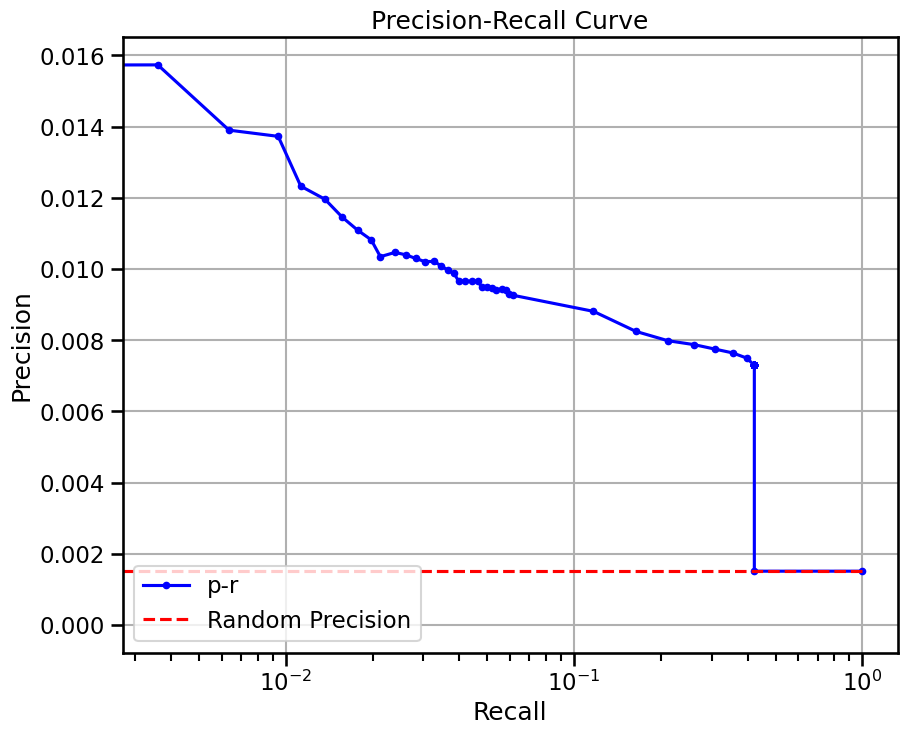

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 91.01 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


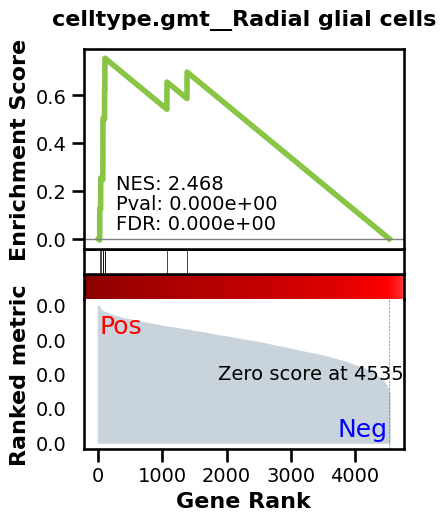

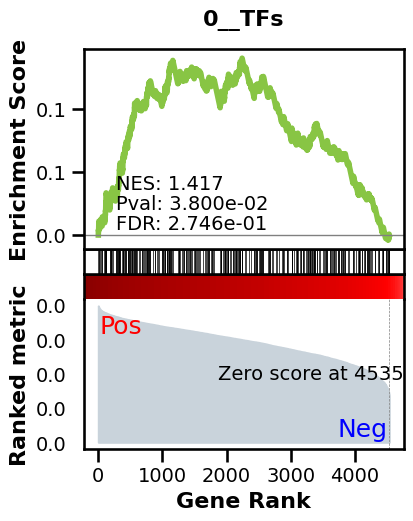

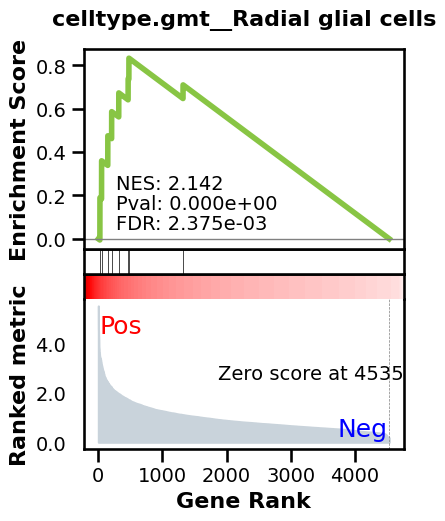

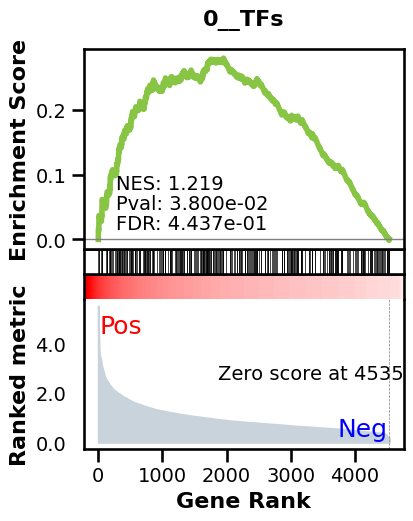

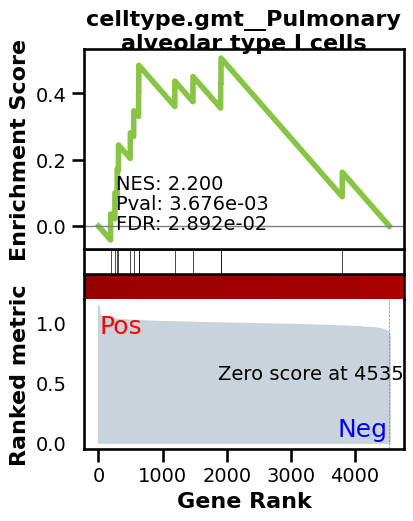

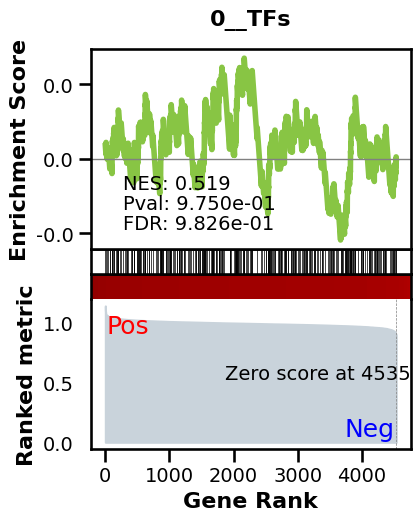

_________________________________________
TF specific enrichment


found some significant results for  8.16326530612245 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3325 genes
intersection pct: 0.7330246913580247
precision:  0.0017159380037267836 
recall:  0.5826587515740241 
random precision: 0.0015089166960723108


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 48.06it/s]

  8%|▊         | 10/128 [00:00<00:02, 48.25it/s]

 12%|█▏        | 15/128 [00:00<00:02, 48.20it/s]

 16%|█▌        | 20/128 [00:00<00:02, 48.12it/s]

 20%|█▉        | 25/128 [00:00<00:02, 48.21it/s]

 23%|██▎       | 30/128 [00:00<00:02, 48.37it/s]

 27%|██▋       | 35/128 [00:00<00:01, 48.45it/s]

 31%|███▏      | 40/128 [00:00<00:01, 48.48it/s]

 35%|███▌      | 45/128 [00:00<00:01, 48.48it/s]

 39%|███▉      | 50/128 [00:01<00:01, 48.51it/s]

 43%|████▎     | 55/128 [00:01<00:01, 48.30it/s]

 47%|████▋     | 60/128 [00:01<00:01, 48.36it/s]

 51%|█████     | 65/128 [00:01<00:01, 48.41it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 48.47it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 48.26it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 48.29it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 48.40it/s]

 70%|███████   | 90/128 [00:01<00:00, 48.36it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 48.24it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 48.13it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 48.24it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 48.27it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 48.28it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 48.33it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 48.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 48.31it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016778968569427172
EPR: 2.153362437632075


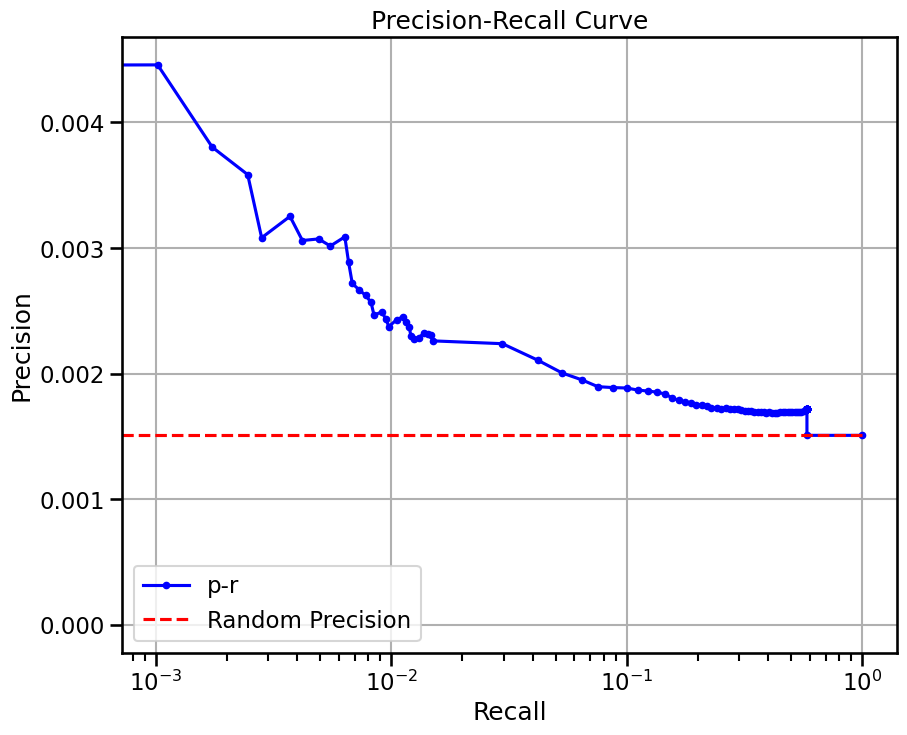

microglial cell

View of AnnData object with n_obs × n_vars = 231 × 4669
    obs: 'biosample_id', 'donor_id', 'cell_type_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type__custom', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'is_primary_data', 'age', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbol', 'ncbi_gene_

Elapsed time: 48.31 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


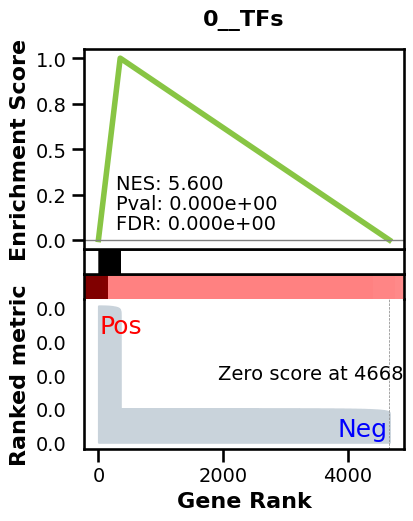

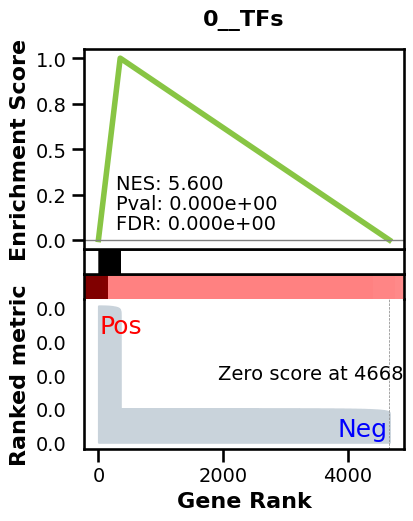

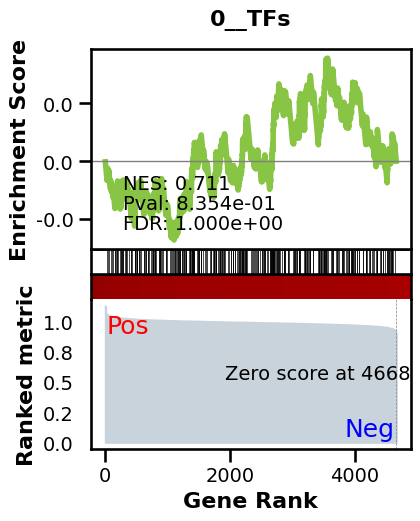

_________________________________________
TF specific enrichment


found some significant results for  4.545454545454546 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3533 genes
intersection pct: 0.7566930820304134
precision:  0.009398343744734495 
recall:  0.44353752945136315 
random precision: 0.0019047075639200561


  0%|          | 0/128 [00:00<?, ?it/s]

  3%|▎         | 4/128 [00:00<00:03, 39.53it/s]

  6%|▋         | 8/128 [00:00<00:03, 39.54it/s]

  9%|▉         | 12/128 [00:00<00:02, 39.58it/s]

 12%|█▎        | 16/128 [00:00<00:02, 39.73it/s]

 16%|█▌        | 20/128 [00:00<00:02, 39.69it/s]

 19%|█▉        | 24/128 [00:00<00:02, 39.74it/s]

 22%|██▏       | 28/128 [00:00<00:02, 39.67it/s]

 25%|██▌       | 32/128 [00:00<00:02, 39.69it/s]

 28%|██▊       | 36/128 [00:00<00:02, 39.72it/s]

 31%|███▏      | 40/128 [00:01<00:02, 39.59it/s]

 34%|███▍      | 44/128 [00:01<00:02, 39.64it/s]

 38%|███▊      | 48/128 [00:01<00:02, 39.63it/s]

 41%|████      | 52/128 [00:01<00:01, 39.64it/s]

 44%|████▍     | 56/128 [00:01<00:01, 39.68it/s]

 47%|████▋     | 60/128 [00:01<00:01, 39.63it/s]

 50%|█████     | 64/128 [00:01<00:01, 39.55it/s]

 53%|█████▎    | 68/128 [00:01<00:01, 39.52it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 39.53it/s]

 59%|█████▉    | 76/128 [00:01<00:01, 39.56it/s]

 62%|██████▎   | 80/128 [00:02<00:01, 39.55it/s]

 66%|██████▌   | 84/128 [00:02<00:01, 39.53it/s]

 69%|██████▉   | 88/128 [00:02<00:01, 39.44it/s]

 72%|███████▏  | 92/128 [00:02<00:00, 39.41it/s]

 75%|███████▌  | 96/128 [00:02<00:00, 39.35it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 39.38it/s]

 81%|████████▏ | 104/128 [00:02<00:00, 39.38it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 39.15it/s]

 88%|████████▊ | 112/128 [00:02<00:00, 38.33it/s]

 91%|█████████ | 116/128 [00:02<00:00, 38.51it/s]

 94%|█████████▍| 120/128 [00:03<00:00, 38.58it/s]

 97%|█████████▋| 124/128 [00:03<00:00, 38.63it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:03<00:00, 38.82it/s]

100%|██████████| 128/128 [00:03<00:00, 39.33it/s]

Area Under Precision-Recall Curve (AUPRC):  0.005346885485951153
EPR: 6.101838234992467


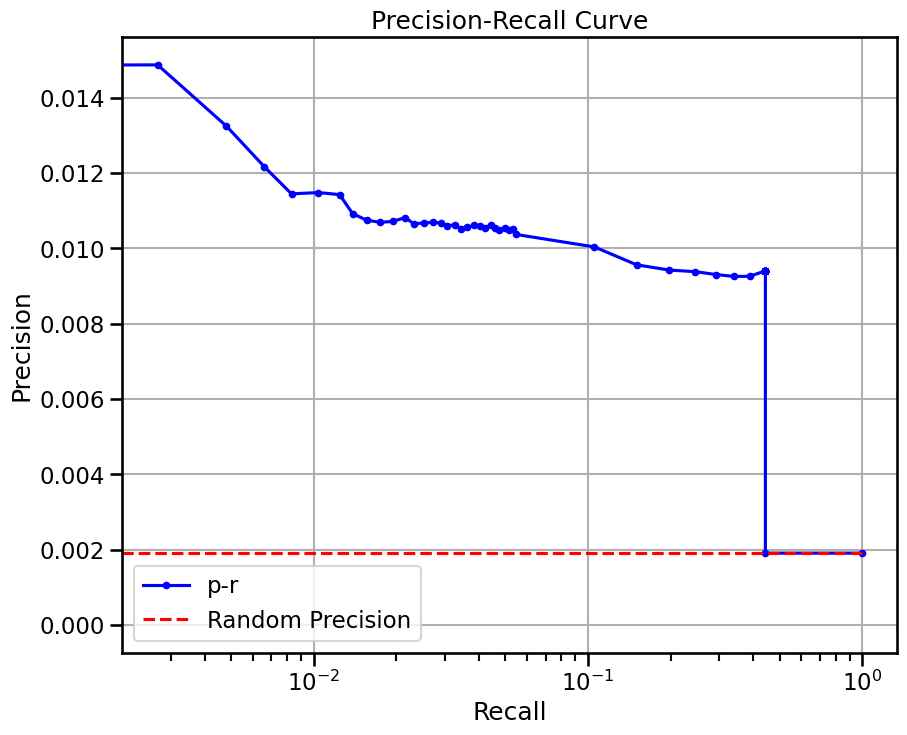

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 99.09 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


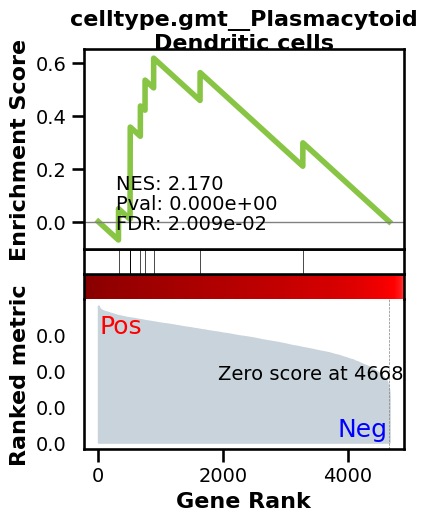

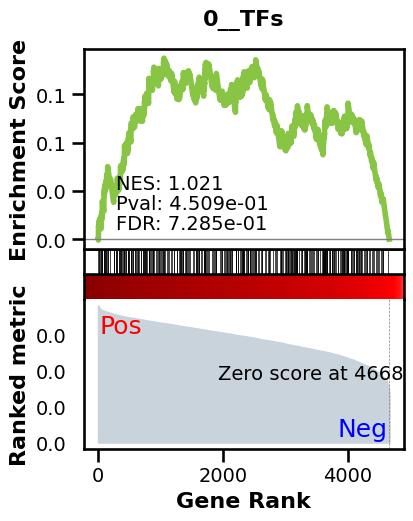

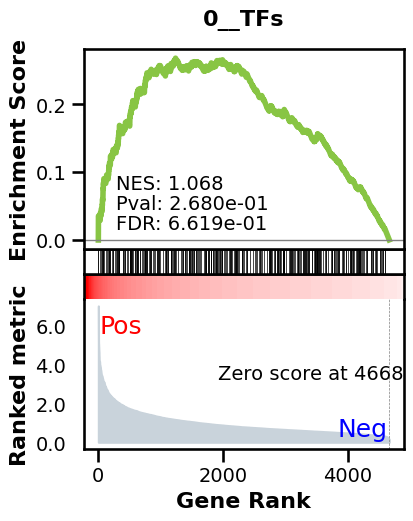

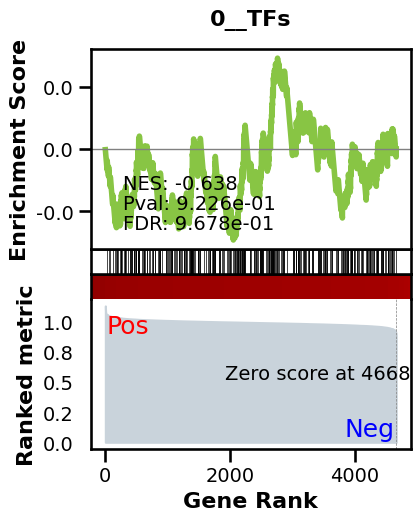

_________________________________________
TF specific enrichment


found some significant results for  3.0303030303030303 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3533 genes
intersection pct: 0.7566930820304134
precision:  0.0020624254948789977 
recall:  0.5679905755637832 
random precision: 0.0019047075639200561


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 41.34it/s]

  8%|▊         | 10/128 [00:00<00:02, 41.16it/s]

 12%|█▏        | 15/128 [00:00<00:02, 41.16it/s]

 16%|█▌        | 20/128 [00:00<00:02, 41.07it/s]

 20%|█▉        | 25/128 [00:00<00:02, 41.20it/s]

 23%|██▎       | 30/128 [00:00<00:02, 41.30it/s]

 27%|██▋       | 35/128 [00:00<00:02, 41.28it/s]

 31%|███▏      | 40/128 [00:00<00:02, 41.28it/s]

 35%|███▌      | 45/128 [00:01<00:02, 41.12it/s]

 39%|███▉      | 50/128 [00:01<00:01, 41.18it/s]

 43%|████▎     | 55/128 [00:01<00:01, 41.20it/s]

 47%|████▋     | 60/128 [00:01<00:01, 41.21it/s]

 51%|█████     | 65/128 [00:01<00:01, 41.25it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 41.31it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 41.38it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 41.47it/s]

 66%|██████▋   | 85/128 [00:02<00:01, 41.30it/s]

 70%|███████   | 90/128 [00:02<00:00, 41.10it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 41.05it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 41.14it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 41.15it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 41.03it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 40.77it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 40.82it/s]

 98%|█████████▊| 125/128 [00:03<00:00, 40.75it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 41.10it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0020362092901500184
EPR: 1.393700950759576


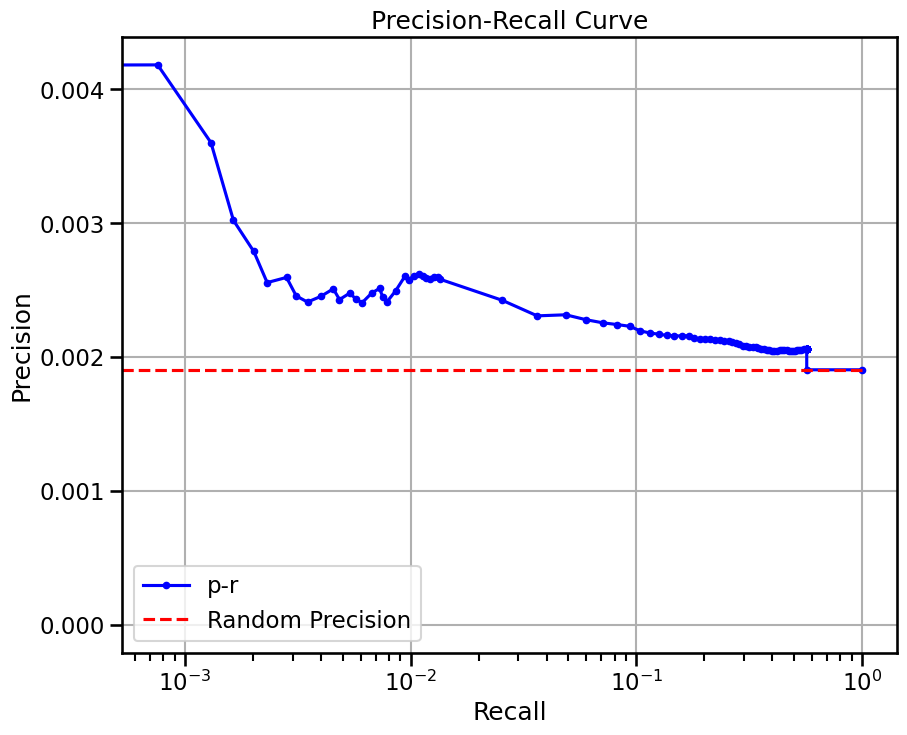

In [5]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(
        genes) & adata.var.index.isin(to_use)]
    print(celltype)
    print("")
    print(subadata)
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()

In [6]:
metrics

{'genie3_tf_retinal rod cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Gamma (PP) cells',
   'celltype.gmt__Satellite cells',
   'celltype.gmt__Enteroendocrine cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Beta cells'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.005183510175682728,
  'recall': 0.4901315789473684,
  'rand_precision': 0.0007671537083301789,
  'auprc': 0.005001412610736761,
  'epr': 22.128779320141835},
 'genie3_retinal rod cell': {'enriched_terms_Central': ['celltype.gmt__Cone photoreceptor cells',
   'celltype.gmt__Rod photoreceptor cells'],
  'significant_enriched_TFtargets': 0.0,
  'precision': 0.0007712833782211967,
  'recall': 0.8157894736842105,
  'rand_precision': 0.0007671537083301789,
  'auprc': 0.0011899048099128628,
  'epr': 8.676461558703565},
 'genie3_tf_Mueller cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embry

In [7]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name        EPR     AUPRC      RAND    TF_targ  TF_enr  \
0         retinal rod cell  22.128779  0.005001  0.000767   0.000000    True   
1         retinal rod cell   8.676462  0.001190  0.000767   0.000000   False   
2             Mueller cell  10.402777  0.004282  0.001492   1.754386    True   
3             Mueller cell   2.839912  0.001662  0.001492  22.807018   False   
4            amacrine cell   7.510121  0.001577  0.000822   0.000000    True   
5            amacrine cell   2.388903  0.000923  0.000822   3.846154   False   
6          ON-bipolar cell   4.131571  0.001070  0.000778   0.000000    True   
7          ON-bipolar cell   1.921485  0.000947  0.000778  12.500000   False   
8         rod bipolar cell   4.798676  0.000990  0.000675   4.000000    True   
9         rod bipolar cell   3.783271  0.000795  0.000675  16.000000   False   
10       retinal cone cell   8.713956  0.001486  0.000725   6.451613    True   
11       retinal cone cell   1.725390  0.000833  0.000725   3.225806   False   
12  retina horizontal cell   8.092063  0.002117  0.001001   8.333333    True   
13  retina horizontal cell   2.353188  0.001113  0.001001   0.000000   False   
14   retinal ganglion cell   5.752323  0.001717  0.000984   4.545455    True   
15   retinal ganglion cell   1.642741  0.001059  0.000984   9.090909   False   
16               astrocyte   8.242254  0.004430  0.001509   4.081633    True   
17               astrocyte   2.153362  0.001678  0.001509   8.163265   False   
18         microglial cell   6.101838  0.005347  0.001905   4.545455    True   
19         microglial cell   1.393701  0.002036  0.001905   3.030303   False   

    TF_only  
0      True  
1     False  
2      True  
3     False  
4      True  
5     False  
6      True  
7     False  
8      True  
9     False  
10     True  
11    False  
12     True  
13    False  
14     True  
15    False  
16     True  
17    False  
18     True  
19    False